#### Various RNN models will be built and their forecasts will be compared

In [1]:
#Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.contrib.keras import models, layers
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('./UK Pop X Age.csv', index_col=0)

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Data Exploration

In [21]:
df.head()

,% of pop 0-19 years,% of pop 20-39 years,% of pop 40-59 years,% of pop 60-79 years,% of pop 80+ years
TIME,,,,,
1954,28.884462,27.689243,27.091633,14.541833,1.792829
1955,29.300000,27.300000,27.100000,14.500000,1.800000
1956,29.488465,26.880642,27.281846,14.543631,1.805416
1957,29.540918,26.846307,27.045908,14.770459,1.796407
1958,29.640719,26.746507,26.946108,14.970060,1.696607


Figures are proportions

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1954 to 2017
Data columns (total 5 columns):
% of pop 0-19 years     64 non-null float64
% of pop 20-39 years    64 non-null float64
% of pop 40-59 years    64 non-null float64
% of pop 60-79 years    64 non-null float64
% of pop 80+ years      64 non-null float64
dtypes: float64(5)
memory usage: 5.5 KB


The series start in 1954 and terminates in 2017

Text(0,0.5,'Proportion')

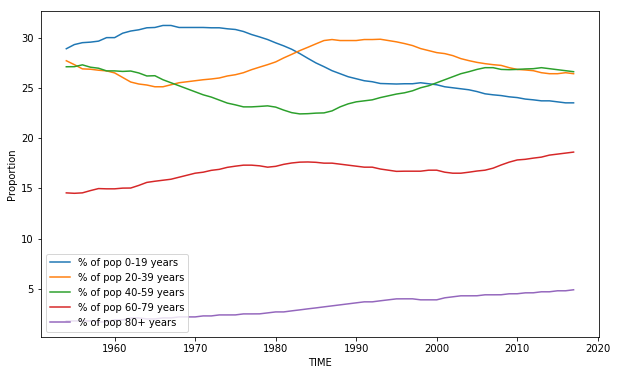

In [2]:
chart = df.plot(figsize = (10,6))
chart.legend(loc='best')
chart.set_ylabel('Proportion')

We can see that in general the UK is getting older

#### Let's get modelling!

In [3]:
#Some helper functions for making an LSTM model and plotting the results:

#After some light experimentation this model seemed to be the most accurate (for the model with sequence inputs)
#dropout layers did not boost performance
def makeModel(timesteps, features, outputs):
    model = models.Sequential()
    model.add(layers.LSTM(16, input_shape=(timesteps, features),activation = 'relu', return_sequences = True))
    model.add(layers.LSTM(32,activation = 'relu', return_sequences = True))
    model.add(layers.LSTM(16,activation = 'relu'))
    model.add(layers.Dense(outputs))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    
    return model
    
def resultPlot(y_pred, year):    
    #inverse transform
    preddy = scaler.inverse_transform(y_pred)
    #plot
    preddyDF = pd.DataFrame(preddy, columns = df.columns)
    preddyDF.index = df.iloc[-len(y_pred):].index
    preddyDF.columns = [x + '_pred' for x in preddyDF.columns]
    pd.concat((df.loc[year:],preddyDF), axis=1).plot(ylim = 0, figsize = (15,9))

In [4]:
#split and scale
split = 2004 #roughly an 80-20 split

train = df.loc[:split]
test = df.loc[split+1:]

scaler = MinMaxScaler()
train_scaled  = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

#Make X and y sets for model fitting.
X_train = train_scaled[:-1]
y_train = train_scaled[1:]

X_test = test_scaled[:-1]
y_test = test_scaled[1:]

print('X_train shape: {}'.format(X_train.shape))

X_train shape: (50, 5)


In [5]:
# change shape to (batch, timesteps, features), one time step for now.
X_train = X_train[:, None]
X_test = X_test[:, None]
print('X_train shape: {}'.format(X_train.shape))

X_train shape: (50, 1, 5)


In [6]:
#make model
model1 = makeModel(1,5,5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 16)             1408      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             6272      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 5)                 85        
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


In [7]:
#fit model
model1.fit(X_train, y_train, epochs = 4000)

Epoch 1/4000
50/50 [==============================] - 2s 34ms/step - loss: 0.3908
Epoch 2/4000
50/50 [==============================] - 0s 140us/step - loss: 0.3883
Epoch 3/4000
50/50 [==============================] - 0s 180us/step - loss: 0.3858
Epoch 4/4000
50/50 [==============================] - 0s 200us/step - loss: 0.3834
Epoch 5/4000
50/50 [==============================] - 0s 180us/step - loss: 0.3809
Epoch 6/4000
50/50 [==============================] - 0s 140us/step - loss: 0.3785
Epoch 7/4000
50/50 [==============================] - 0s 220us/step - loss: 0.3760
Epoch 8/4000
50/50 [==============================] - 0s 160us/step - loss: 0.3736
Epoch 9/4000
50/50 [==============================] - 0s 140us/step - loss: 0.3711
Epoch 10/4000
50/50 [==============================] - 0s 120us/step - loss: 0.3686
Epoch 11/4000
50/50 [==============================] - 0s 180us/step - loss: 0.3662
Epoch 12/4000
50/50 [==============================] - 0s 140us/step - loss: 0.3637
Ep

50/50 [==============================] - 0s 120us/step - loss: 0.0984
Epoch 99/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0981
Epoch 100/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0978
Epoch 101/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0974
Epoch 102/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0971
Epoch 103/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0967
Epoch 104/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0964
Epoch 105/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0961
Epoch 106/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0957
Epoch 107/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0953
Epoch 108/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0949
Epoch 109/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0

50/50 [==============================] - 0s 180us/step - loss: 0.0322
Epoch 195/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0320
Epoch 196/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0317
Epoch 197/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0314
Epoch 198/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0311
Epoch 199/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0309
Epoch 200/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0306
Epoch 201/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0303
Epoch 202/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0300
Epoch 203/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0297
Epoch 204/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0295
Epoch 205/4000
50/50 [==============================] - 0s 160us/step - loss: 0.

50/50 [==============================] - 0s 140us/step - loss: 0.0087
Epoch 291/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0086
Epoch 292/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0085
Epoch 293/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0084
Epoch 294/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0083
Epoch 295/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0082
Epoch 296/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0081
Epoch 297/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0080
Epoch 298/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0079
Epoch 299/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0078
Epoch 300/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0077
Epoch 301/4000
50/50 [==============================] - 0s 160us/step - loss: 0.

50/50 [==============================] - 0s 160us/step - loss: 0.0035
Epoch 387/4000
50/50 [==============================] - 0s 240us/step - loss: 0.0035
Epoch 388/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0034
Epoch 389/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0034
Epoch 390/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0034
Epoch 391/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0034
Epoch 392/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0033
Epoch 393/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0033
Epoch 394/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0033
Epoch 395/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0032
Epoch 396/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0032
Epoch 397/4000
50/50 [==============================] - 0s 120us/step - loss: 0.

50/50 [==============================] - 0s 140us/step - loss: 0.0016
Epoch 483/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0016
Epoch 484/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0016
Epoch 485/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0016
Epoch 486/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0016
Epoch 487/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0016
Epoch 488/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0015
Epoch 489/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0015
Epoch 490/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0015
Epoch 491/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0015
Epoch 492/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0015
Epoch 493/4000
50/50 [==============================] - 0s 160us/step - loss: 0.

50/50 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 579/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 580/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0011
Epoch 581/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0011
Epoch 582/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 583/4000
50/50 [==============================] - 0s 160us/step - loss: 0.0011
Epoch 584/4000
50/50 [==============================] - 0s 100us/step - loss: 0.0011
Epoch 585/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0011
Epoch 586/4000
50/50 [==============================] - 0s 120us/step - loss: 0.0011
Epoch 587/4000
50/50 [==============================] - 0s 180us/step - loss: 0.0011
Epoch 588/4000
50/50 [==============================] - 0s 140us/step - loss: 0.0011
Epoch 589/4000
50/50 [==============================] - 0s 140us/step - loss: 0.

50/50 [==============================] - 0s 160us/step - loss: 8.4125e-04
Epoch 672/4000
50/50 [==============================] - 0s 160us/step - loss: 8.3218e-04
Epoch 673/4000
50/50 [==============================] - 0s 120us/step - loss: 8.3113e-04
Epoch 674/4000
50/50 [==============================] - 0s 140us/step - loss: 8.3789e-04
Epoch 675/4000
50/50 [==============================] - 0s 160us/step - loss: 8.3651e-04
Epoch 676/4000
50/50 [==============================] - 0s 140us/step - loss: 8.2690e-04
Epoch 677/4000
50/50 [==============================] - 0s 160us/step - loss: 8.3734e-04
Epoch 678/4000
50/50 [==============================] - 0s 160us/step - loss: 8.2220e-04
Epoch 679/4000
50/50 [==============================] - 0s 120us/step - loss: 8.2443e-04
Epoch 680/4000
50/50 [==============================] - 0s 160us/step - loss: 8.2639e-04
Epoch 681/4000
50/50 [==============================] - ETA: 0s - loss: 9.8748e-0 - 0s 120us/step - loss: 8.1898e-04
Epoch 68

50/50 [==============================] - 0s 120us/step - loss: 7.0167e-04
Epoch 763/4000
50/50 [==============================] - 0s 120us/step - loss: 6.8763e-04
Epoch 764/4000
50/50 [==============================] - 0s 140us/step - loss: 6.9910e-04
Epoch 765/4000
50/50 [==============================] - 0s 120us/step - loss: 6.9561e-04
Epoch 766/4000
50/50 [==============================] - 0s 140us/step - loss: 6.9257e-04
Epoch 767/4000
50/50 [==============================] - 0s 140us/step - loss: 6.9746e-04
Epoch 768/4000
50/50 [==============================] - 0s 120us/step - loss: 6.9578e-04
Epoch 769/4000
50/50 [==============================] - 0s 140us/step - loss: 6.9407e-04
Epoch 770/4000
50/50 [==============================] - 0s 160us/step - loss: 6.8172e-04
Epoch 771/4000
50/50 [==============================] - 0s 160us/step - loss: 6.8691e-04
Epoch 772/4000
50/50 [==============================] - 0s 140us/step - loss: 6.9608e-04
Epoch 773/4000
50/50 [==============

50/50 [==============================] - 0s 120us/step - loss: 6.2522e-04
Epoch 854/4000
50/50 [==============================] - 0s 120us/step - loss: 6.1597e-04
Epoch 855/4000
50/50 [==============================] - 0s 140us/step - loss: 6.1899e-04
Epoch 856/4000
50/50 [==============================] - 0s 140us/step - loss: 6.0984e-04
Epoch 857/4000
50/50 [==============================] - 0s 180us/step - loss: 6.2040e-04
Epoch 858/4000
50/50 [==============================] - 0s 120us/step - loss: 6.1025e-04
Epoch 859/4000
50/50 [==============================] - 0s 140us/step - loss: 6.2042e-04
Epoch 860/4000
50/50 [==============================] - 0s 140us/step - loss: 6.2190e-04
Epoch 861/4000
50/50 [==============================] - 0s 200us/step - loss: 6.1224e-04
Epoch 862/4000
50/50 [==============================] - 0s 140us/step - loss: 6.2482e-04
Epoch 863/4000
50/50 [==============================] - 0s 180us/step - loss: 6.2206e-04
Epoch 864/4000
50/50 [==============

50/50 [==============================] - 0s 180us/step - loss: 5.8803e-04
Epoch 946/4000
50/50 [==============================] - 0s 140us/step - loss: 5.6376e-04
Epoch 947/4000
50/50 [==============================] - 0s 140us/step - loss: 5.9580e-04
Epoch 948/4000
50/50 [==============================] - 0s 120us/step - loss: 5.7660e-04
Epoch 949/4000
50/50 [==============================] - 0s 120us/step - loss: 6.0030e-04
Epoch 950/4000
50/50 [==============================] - 0s 140us/step - loss: 5.8040e-04
Epoch 951/4000
50/50 [==============================] - 0s 160us/step - loss: 5.8350e-04
Epoch 952/4000
50/50 [==============================] - 0s 140us/step - loss: 5.8022e-04
Epoch 953/4000
50/50 [==============================] - 0s 140us/step - loss: 5.7640e-04
Epoch 954/4000
50/50 [==============================] - 0s 160us/step - loss: 5.6795e-04
Epoch 955/4000
50/50 [==============================] - 0s 140us/step - loss: 5.6755e-04
Epoch 956/4000
50/50 [==============

50/50 [==============================] - 0s 140us/step - loss: 5.3597e-04
Epoch 1037/4000
50/50 [==============================] - 0s 180us/step - loss: 5.2786e-04
Epoch 1038/4000
50/50 [==============================] - 0s 180us/step - loss: 5.4657e-04
Epoch 1039/4000
50/50 [==============================] - 0s 160us/step - loss: 5.5998e-04
Epoch 1040/4000
50/50 [==============================] - 0s 160us/step - loss: 5.6414e-04
Epoch 1041/4000
50/50 [==============================] - 0s 160us/step - loss: 5.4918e-04
Epoch 1042/4000
50/50 [==============================] - 0s 140us/step - loss: 5.4735e-04
Epoch 1043/4000
50/50 [==============================] - 0s 140us/step - loss: 5.5516e-04
Epoch 1044/4000
50/50 [==============================] - 0s 140us/step - loss: 5.3858e-04
Epoch 1045/4000
50/50 [==============================] - 0s 120us/step - loss: 5.3238e-04
Epoch 1046/4000
50/50 [==============================] - 0s 140us/step - loss: 5.4250e-04
Epoch 1047/4000
50/50 [===

Epoch 1127/4000
50/50 [==============================] - 0s 140us/step - loss: 5.1593e-04
Epoch 1128/4000
50/50 [==============================] - 0s 160us/step - loss: 5.0710e-04
Epoch 1129/4000
50/50 [==============================] - 0s 140us/step - loss: 5.0298e-04
Epoch 1130/4000
50/50 [==============================] - 0s 140us/step - loss: 4.9733e-04
Epoch 1131/4000
50/50 [==============================] - 0s 140us/step - loss: 4.9870e-04
Epoch 1132/4000
50/50 [==============================] - 0s 180us/step - loss: 5.1135e-04
Epoch 1133/4000
50/50 [==============================] - 0s 160us/step - loss: 5.0350e-04
Epoch 1134/4000
50/50 [==============================] - 0s 160us/step - loss: 5.1631e-04
Epoch 1135/4000
50/50 [==============================] - 0s 140us/step - loss: 5.2076e-04
Epoch 1136/4000
50/50 [==============================] - 0s 140us/step - loss: 5.2448e-04
Epoch 1137/4000
50/50 [==============================] - 0s 160us/step - loss: 5.0732e-04
Epoch 1138

50/50 [==============================] - 0s 120us/step - loss: 5.1092e-04
Epoch 1219/4000
50/50 [==============================] - 0s 120us/step - loss: 4.7989e-04
Epoch 1220/4000
50/50 [==============================] - 0s 160us/step - loss: 5.1648e-04
Epoch 1221/4000
50/50 [==============================] - 0s 200us/step - loss: 4.9229e-04
Epoch 1222/4000
50/50 [==============================] - 0s 140us/step - loss: 4.8368e-04
Epoch 1223/4000
50/50 [==============================] - 0s 140us/step - loss: 4.8987e-04
Epoch 1224/4000
50/50 [==============================] - 0s 120us/step - loss: 4.8318e-04
Epoch 1225/4000
50/50 [==============================] - 0s 180us/step - loss: 4.8783e-04
Epoch 1226/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7539e-04
Epoch 1227/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7917e-04
Epoch 1228/4000
50/50 [==============================] - 0s 120us/step - loss: 4.8907e-04
Epoch 1229/4000
50/50 [===

50/50 [==============================] - 0s 140us/step - loss: 4.6946e-04
Epoch 1310/4000
50/50 [==============================] - 0s 160us/step - loss: 4.7190e-04
Epoch 1311/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7049e-04
Epoch 1312/4000
50/50 [==============================] - 0s 160us/step - loss: 4.6288e-04
Epoch 1313/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7527e-04
Epoch 1314/4000
50/50 [==============================] - 0s 140us/step - loss: 4.6519e-04
Epoch 1315/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7139e-04
Epoch 1316/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7100e-04
Epoch 1317/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7371e-04
Epoch 1318/4000
50/50 [==============================] - 0s 180us/step - loss: 4.7629e-04
Epoch 1319/4000
50/50 [==============================] - 0s 140us/step - loss: 4.7604e-04
Epoch 1320/4000
50/50 [===

50/50 [==============================] - 0s 180us/step - loss: 4.5509e-04
Epoch 1400/4000
50/50 [==============================] - 0s 180us/step - loss: 4.6041e-04
Epoch 1401/4000
50/50 [==============================] - 0s 140us/step - loss: 4.6263e-04
Epoch 1402/4000
50/50 [==============================] - 0s 120us/step - loss: 4.5792e-04
Epoch 1403/4000
50/50 [==============================] - 0s 160us/step - loss: 4.5075e-04
Epoch 1404/4000
50/50 [==============================] - 0s 160us/step - loss: 4.5267e-04
Epoch 1405/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4784e-04
Epoch 1406/4000
50/50 [==============================] - 0s 140us/step - loss: 4.5055e-04
Epoch 1407/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4908e-04
Epoch 1408/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4863e-04
Epoch 1409/4000
50/50 [==============================] - 0s 180us/step - loss: 4.5271e-04
Epoch 1410/4000
50/50 [===

50/50 [==============================] - 0s 140us/step - loss: 4.4813e-04
Epoch 1490/4000
50/50 [==============================] - 0s 180us/step - loss: 4.3785e-04
Epoch 1491/4000
50/50 [==============================] - 0s 160us/step - loss: 4.3223e-04
Epoch 1492/4000
50/50 [==============================] - 0s 160us/step - loss: 4.3859e-04
Epoch 1493/4000
50/50 [==============================] - 0s 140us/step - loss: 4.3956e-04
Epoch 1494/4000
50/50 [==============================] - 0s 160us/step - loss: 4.4394e-04
Epoch 1495/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4283e-04
Epoch 1496/4000
50/50 [==============================] - 0s 120us/step - loss: 4.3255e-04
Epoch 1497/4000
50/50 [==============================] - 0s 240us/step - loss: 4.3687e-04
Epoch 1498/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4261e-04
Epoch 1499/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4443e-04
Epoch 1500/4000
50/50 [===

50/50 [==============================] - 0s 140us/step - loss: 4.2360e-04
Epoch 1580/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4372e-04
Epoch 1581/4000
50/50 [==============================] - 0s 140us/step - loss: 4.3423e-04
Epoch 1582/4000
50/50 [==============================] - 0s 120us/step - loss: 4.4832e-04
Epoch 1583/4000
50/50 [==============================] - 0s 160us/step - loss: 4.2902e-04
Epoch 1584/4000
50/50 [==============================] - 0s 120us/step - loss: 4.3101e-04
Epoch 1585/4000
50/50 [==============================] - 0s 120us/step - loss: 4.5219e-04
Epoch 1586/4000
50/50 [==============================] - 0s 180us/step - loss: 4.4182e-04
Epoch 1587/4000
50/50 [==============================] - 0s 140us/step - loss: 4.2741e-04
Epoch 1588/4000
50/50 [==============================] - 0s 120us/step - loss: 4.4258e-04
Epoch 1589/4000
50/50 [==============================] - 0s 120us/step - loss: 4.2730e-04
Epoch 1590/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 4.3066e-04
Epoch 1671/4000
50/50 [==============================] - 0s 160us/step - loss: 4.2084e-04
Epoch 1672/4000
50/50 [==============================] - 0s 140us/step - loss: 4.2549e-04
Epoch 1673/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1778e-04
Epoch 1674/4000
50/50 [==============================] - 0s 120us/step - loss: 4.2327e-04
Epoch 1675/4000
50/50 [==============================] - 0s 120us/step - loss: 4.1887e-04
Epoch 1676/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1450e-04
Epoch 1677/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1513e-04
Epoch 1678/4000
50/50 [==============================] - 0s 120us/step - loss: 4.1224e-04
Epoch 1679/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1704e-04
Epoch 1680/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1850e-04
Epoch 1681/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 4.4070e-04
Epoch 1762/4000
50/50 [==============================] - 0s 120us/step - loss: 4.2126e-04
Epoch 1763/4000
50/50 [==============================] - 0s 120us/step - loss: 4.1259e-04
Epoch 1764/4000
50/50 [==============================] - 0s 140us/step - loss: 4.3541e-04
Epoch 1765/4000
50/50 [==============================] - 0s 160us/step - loss: 4.2471e-04
Epoch 1766/4000
50/50 [==============================] - 0s 120us/step - loss: 4.3539e-04
Epoch 1767/4000
50/50 [==============================] - 0s 120us/step - loss: 4.2474e-04
Epoch 1768/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1851e-04
Epoch 1769/4000
50/50 [==============================] - 0s 120us/step - loss: 4.4348e-04
Epoch 1770/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4867e-04
Epoch 1771/4000
50/50 [==============================] - 0s 120us/step - loss: 4.2602e-04
Epoch 1772/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 4.1280e-04
Epoch 1853/4000
50/50 [==============================] - 0s 120us/step - loss: 4.1355e-04
Epoch 1854/4000
50/50 [==============================] - 0s 100us/step - loss: 4.2490e-04
Epoch 1855/4000
50/50 [==============================] - 0s 120us/step - loss: 4.3294e-04
Epoch 1856/4000
50/50 [==============================] - 0s 120us/step - loss: 4.1732e-04
Epoch 1857/4000
50/50 [==============================] - 0s 180us/step - loss: 4.2208e-04
Epoch 1858/4000
50/50 [==============================] - 0s 140us/step - loss: 4.5165e-04
Epoch 1859/4000
50/50 [==============================] - 0s 140us/step - loss: 4.4955e-04
Epoch 1860/4000
50/50 [==============================] - 0s 160us/step - loss: 4.2395e-04
Epoch 1861/4000
50/50 [==============================] - 0s 140us/step - loss: 4.3150e-04
Epoch 1862/4000
50/50 [==============================] - 0s 140us/step - loss: 4.2021e-04
Epoch 1863/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.9635e-04
Epoch 1943/4000
50/50 [==============================] - 0s 120us/step - loss: 4.0510e-04
Epoch 1944/4000
50/50 [==============================] - 0s 100us/step - loss: 3.9785e-04
Epoch 1945/4000
50/50 [==============================] - 0s 140us/step - loss: 4.0634e-04
Epoch 1946/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9966e-04
Epoch 1947/4000
50/50 [==============================] - 0s 160us/step - loss: 4.0629e-04
Epoch 1948/4000
50/50 [==============================] - 0s 180us/step - loss: 3.9608e-04
Epoch 1949/4000
50/50 [==============================] - 0s 140us/step - loss: 4.0627e-04
Epoch 1950/4000
50/50 [==============================] - 0s 160us/step - loss: 4.1261e-04
Epoch 1951/4000
50/50 [==============================] - 0s 180us/step - loss: 3.9671e-04
Epoch 1952/4000
50/50 [==============================] - 0s 160us/step - loss: 4.1571e-04
Epoch 1953/4000
50/50 [===

50/50 [==============================] - 0s 160us/step - loss: 3.9021e-04
Epoch 2033/4000
50/50 [==============================] - 0s 160us/step - loss: 4.0154e-04
Epoch 2034/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1845e-04
Epoch 2035/4000
50/50 [==============================] - 0s 160us/step - loss: 4.0693e-04
Epoch 2036/4000
50/50 [==============================] - 0s 180us/step - loss: 4.0011e-04
Epoch 2037/4000
50/50 [==============================] - 0s 140us/step - loss: 4.0159e-04
Epoch 2038/4000
50/50 [==============================] - 0s 120us/step - loss: 4.0688e-04
Epoch 2039/4000
50/50 [==============================] - 0s 180us/step - loss: 4.0126e-04
Epoch 2040/4000
50/50 [==============================] - 0s 140us/step - loss: 4.1751e-04
Epoch 2041/4000
50/50 [==============================] - 0s 120us/step - loss: 4.0614e-04
Epoch 2042/4000
50/50 [==============================] - 0s 140us/step - loss: 3.9838e-04
Epoch 2043/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.9595e-04
Epoch 2123/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9501e-04
Epoch 2124/4000
50/50 [==============================] - 0s 120us/step - loss: 3.9481e-04
Epoch 2125/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9628e-04
Epoch 2126/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9291e-04
Epoch 2127/4000
50/50 [==============================] - 0s 120us/step - loss: 3.9589e-04
Epoch 2128/4000
50/50 [==============================] - 0s 160us/step - loss: 3.8565e-04
Epoch 2129/4000
50/50 [==============================] - 0s 140us/step - loss: 4.0480e-04
Epoch 2130/4000
50/50 [==============================] - 0s 180us/step - loss: 3.8502e-04
Epoch 2131/4000
50/50 [==============================] - 0s 160us/step - loss: 4.0298e-04
Epoch 2132/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9398e-04
Epoch 2133/4000
50/50 [===

50/50 [==============================] - 0s 140us/step - loss: 3.9283e-04
Epoch 2214/4000
50/50 [==============================] - 0s 120us/step - loss: 3.9213e-04
Epoch 2215/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8744e-04
Epoch 2216/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8651e-04
Epoch 2217/4000
50/50 [==============================] - 0s 100us/step - loss: 3.8452e-04
Epoch 2218/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8540e-04
Epoch 2219/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8274e-04
Epoch 2220/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8020e-04
Epoch 2221/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8780e-04
Epoch 2222/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9384e-04
Epoch 2223/4000
50/50 [==============================] - 0s 140us/step - loss: 4.0488e-04
Epoch 2224/4000
50/50 [===

50/50 [==============================] - 0s 160us/step - loss: 3.9773e-04
Epoch 2304/4000
50/50 [==============================] - 0s 160us/step - loss: 4.2035e-04
Epoch 2305/4000
50/50 [==============================] - 0s 140us/step - loss: 4.0136e-04
Epoch 2306/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8770e-04
Epoch 2307/4000
50/50 [==============================] - 0s 140us/step - loss: 4.0680e-04
Epoch 2308/4000
50/50 [==============================] - 0s 160us/step - loss: 4.1074e-04
Epoch 2309/4000
50/50 [==============================] - 0s 180us/step - loss: 3.9745e-04
Epoch 2310/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8811e-04
Epoch 2311/4000
50/50 [==============================] - 0s 140us/step - loss: 3.9134e-04
Epoch 2312/4000
50/50 [==============================] - 0s 120us/step - loss: 3.9014e-04
Epoch 2313/4000
50/50 [==============================] - 0s 180us/step - loss: 3.9156e-04
Epoch 2314/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.8310e-04
Epoch 2395/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7590e-04
Epoch 2396/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7895e-04
Epoch 2397/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8336e-04
Epoch 2398/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7629e-04
Epoch 2399/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8418e-04
Epoch 2400/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7987e-04
Epoch 2401/4000
50/50 [==============================] - 0s 160us/step - loss: 3.8221e-04
Epoch 2402/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7489e-04
Epoch 2403/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7956e-04
Epoch 2404/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7424e-04
Epoch 2405/4000
50/50 [===

50/50 [==============================] - 0s 160us/step - loss: 3.8434e-04
Epoch 2486/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8172e-04
Epoch 2487/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7693e-04
Epoch 2488/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8086e-04
Epoch 2489/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7606e-04
Epoch 2490/4000
50/50 [==============================] - 0s 160us/step - loss: 3.8174e-04
Epoch 2491/4000
50/50 [==============================] - 0s 140us/step - loss: 3.9026e-04
Epoch 2492/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7573e-04
Epoch 2493/4000
50/50 [==============================] - 0s 140us/step - loss: 3.9302e-04
Epoch 2494/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8862e-04
Epoch 2495/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8579e-04
Epoch 2496/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.8208e-04
Epoch 2577/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6860e-04
Epoch 2578/4000
50/50 [==============================] - 0s 100us/step - loss: 3.8117e-04
Epoch 2579/4000
50/50 [==============================] - 0s 160us/step - loss: 3.8994e-04
Epoch 2580/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8718e-04
Epoch 2581/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7871e-04
Epoch 2582/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7577e-04
Epoch 2583/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7573e-04
Epoch 2584/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9271e-04
Epoch 2585/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8788e-04
Epoch 2586/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7680e-04
Epoch 2587/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.8430e-04
Epoch 2668/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7436e-04
Epoch 2669/4000
50/50 [==============================] - 0s 160us/step - loss: 3.9273e-04
Epoch 2670/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7237e-04
Epoch 2671/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7670e-04
Epoch 2672/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7820e-04
Epoch 2673/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7493e-04
Epoch 2674/4000
50/50 [==============================] - 0s 180us/step - loss: 3.6750e-04
Epoch 2675/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7962e-04
Epoch 2676/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7766e-04
Epoch 2677/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7862e-04
Epoch 2678/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.8816e-04
Epoch 2759/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8398e-04
Epoch 2760/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8470e-04
Epoch 2761/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8594e-04
Epoch 2762/4000
50/50 [==============================] - 0s 140us/step - loss: 3.9291e-04
Epoch 2763/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8371e-04
Epoch 2764/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7533e-04
Epoch 2765/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7811e-04
Epoch 2766/4000
50/50 [==============================] - 0s 160us/step - loss: 3.8280e-04
Epoch 2767/4000
50/50 [==============================] - 0s 160us/step - loss: 3.8780e-04
Epoch 2768/4000
50/50 [==============================] - 0s 280us/step - loss: 3.7351e-04
Epoch 2769/4000
50/50 [===

50/50 [==============================] - 0s 140us/step - loss: 3.6304e-04
Epoch 2849/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6227e-04
Epoch 2850/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6733e-04
Epoch 2851/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6772e-04
Epoch 2852/4000
50/50 [==============================] - 0s 100us/step - loss: 3.6133e-04
Epoch 2853/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6491e-04
Epoch 2854/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6367e-04
Epoch 2855/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6425e-04
Epoch 2856/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5992e-04
Epoch 2857/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6147e-04
Epoch 2858/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6169e-04
Epoch 2859/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.6899e-04
Epoch 2940/4000
50/50 [==============================] - 0s 120us/step - loss: 3.7030e-04
Epoch 2941/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6685e-04
Epoch 2942/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6722e-04
Epoch 2943/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6544e-04
Epoch 2944/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7128e-04
Epoch 2945/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6278e-04
Epoch 2946/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6616e-04
Epoch 2947/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6211e-04
Epoch 2948/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6282e-04
Epoch 2949/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5639e-04
Epoch 2950/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.8056e-04
Epoch 3031/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7113e-04
Epoch 3032/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7454e-04
Epoch 3033/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6467e-04
Epoch 3034/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8359e-04
Epoch 3035/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7742e-04
Epoch 3036/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8313e-04
Epoch 3037/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6285e-04
Epoch 3038/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6360e-04
Epoch 3039/4000
50/50 [==============================] - 0s 160us/step - loss: 3.8005e-04
Epoch 3040/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7332e-04
Epoch 3041/4000
50/50 [===

50/50 [==============================] - 0s 160us/step - loss: 3.5241e-04
Epoch 3121/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6870e-04
Epoch 3122/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6382e-04
Epoch 3123/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7075e-04
Epoch 3124/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6786e-04
Epoch 3125/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6857e-04
Epoch 3126/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5595e-04
Epoch 3127/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6016e-04
Epoch 3128/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8122e-04
Epoch 3129/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5401e-04
Epoch 3130/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6190e-04
Epoch 3131/4000
50/50 [===

50/50 [==============================] - 0s 160us/step - loss: 3.5816e-04
Epoch 3211/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6261e-04
Epoch 3212/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7356e-04
Epoch 3213/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5491e-04
Epoch 3214/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5589e-04
Epoch 3215/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5817e-04
Epoch 3216/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5808e-04
Epoch 3217/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4918e-04
Epoch 3218/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5646e-04
Epoch 3219/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5170e-04
Epoch 3220/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5226e-04
Epoch 3221/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.5327e-04
Epoch 3302/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5412e-04
Epoch 3303/4000
50/50 [==============================] - 0s 120us/step - loss: 3.8383e-04
Epoch 3304/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6602e-04
Epoch 3305/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8684e-04
Epoch 3306/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6832e-04
Epoch 3307/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6311e-04
Epoch 3308/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5804e-04
Epoch 3309/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6877e-04
Epoch 3310/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6717e-04
Epoch 3311/4000
50/50 [==============================] - 0s 160us/step - loss: 3.7024e-04
Epoch 3312/4000
50/50 [===

50/50 [==============================] - 0s 180us/step - loss: 3.5259e-04
Epoch 3392/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5726e-04
Epoch 3393/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5098e-04
Epoch 3394/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5376e-04
Epoch 3395/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5705e-04
Epoch 3396/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6268e-04
Epoch 3397/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6003e-04
Epoch 3398/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5118e-04
Epoch 3399/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5646e-04
Epoch 3400/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5657e-04
Epoch 3401/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5972e-04
Epoch 3402/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.5498e-04
Epoch 3483/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6022e-04
Epoch 3484/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6034e-04
Epoch 3485/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6760e-04
Epoch 3486/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5796e-04
Epoch 3487/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6161e-04
Epoch 3488/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6114e-04
Epoch 3489/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5685e-04
Epoch 3490/4000
50/50 [==============================] - 0s 120us/step - loss: 3.6129e-04
Epoch 3491/4000
50/50 [==============================] - 0s 140us/step - loss: 3.8315e-04
Epoch 3492/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7499e-04
Epoch 3493/4000
50/50 [===

50/50 [==============================] - 0s 160us/step - loss: 3.4630e-04
Epoch 3573/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5878e-04
Epoch 3574/4000
50/50 [==============================] - 0s 120us/step - loss: 3.4967e-04
Epoch 3575/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5249e-04
Epoch 3576/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5698e-04
Epoch 3577/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5018e-04
Epoch 3578/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4904e-04
Epoch 3579/4000
50/50 [==============================] - 0s 160us/step - loss: 3.4598e-04
Epoch 3580/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5664e-04
Epoch 3581/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5031e-04
Epoch 3582/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5364e-04
Epoch 3583/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.4948e-04
Epoch 3664/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5093e-04
Epoch 3665/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7048e-04
Epoch 3666/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6073e-04
Epoch 3667/4000
50/50 [==============================] - 0s 140us/step - loss: 3.6134e-04
Epoch 3668/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5316e-04
Epoch 3669/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5851e-04
Epoch 3670/4000
50/50 [==============================] - 0s 160us/step - loss: 3.6186e-04
Epoch 3671/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4783e-04
Epoch 3672/4000
50/50 [==============================] - 0s 140us/step - loss: 3.9265e-04
Epoch 3673/4000
50/50 [==============================] - 0s 140us/step - loss: 3.7169e-04
Epoch 3674/4000
50/50 [===

50/50 [==============================] - 0s 120us/step - loss: 3.4891e-04
Epoch 3755/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4620e-04
Epoch 3756/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4295e-04
Epoch 3757/4000
50/50 [==============================] - 0s 160us/step - loss: 3.4768e-04
Epoch 3758/4000
50/50 [==============================] - 0s 160us/step - loss: 3.3882e-04
Epoch 3759/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4557e-04
Epoch 3760/4000
50/50 [==============================] - 0s 160us/step - loss: 3.4057e-04
Epoch 3761/4000
50/50 [==============================] - 0s 120us/step - loss: 3.4685e-04
Epoch 3762/4000
50/50 [==============================] - 0s 140us/step - loss: 3.3971e-04
Epoch 3763/4000
50/50 [==============================] - 0s 160us/step - loss: 3.3695e-04
Epoch 3764/4000
50/50 [==============================] - 0s 160us/step - loss: 3.4086e-04
Epoch 3765/4000
50/50 [===

50/50 [==============================] - 0s 140us/step - loss: 3.6119e-04
Epoch 3846/4000
50/50 [==============================] - 0s 100us/step - loss: 3.5617e-04
Epoch 3847/4000
50/50 [==============================] - 0s 120us/step - loss: 3.4390e-04
Epoch 3848/4000
50/50 [==============================] - 0s 120us/step - loss: 3.4990e-04
Epoch 3849/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4954e-04
Epoch 3850/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5174e-04
Epoch 3851/4000
50/50 [==============================] - 0s 120us/step - loss: 3.3905e-04
Epoch 3852/4000
50/50 [==============================] - 0s 160us/step - loss: 3.5005e-04
Epoch 3853/4000
50/50 [==============================] - 0s 160us/step - loss: 3.4893e-04
Epoch 3854/4000
50/50 [==============================] - 0s 180us/step - loss: 3.3500e-04
Epoch 3855/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4544e-04
Epoch 3856/4000
50/50 [===

50/50 [==============================] - 0s 140us/step - loss: 3.4023e-04
Epoch 3936/4000
50/50 [==============================] - 0s 140us/step - loss: 3.5109e-04
Epoch 3937/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5126e-04
Epoch 3938/4000
50/50 [==============================] - 0s 140us/step - loss: 3.4251e-04
Epoch 3939/4000
50/50 [==============================] - 0s 140us/step - loss: 3.3200e-04
Epoch 3940/4000
50/50 [==============================] - 0s 180us/step - loss: 3.3766e-04
Epoch 3941/4000
50/50 [==============================] - 0s 180us/step - loss: 3.5543e-04
Epoch 3942/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5215e-04
Epoch 3943/4000
50/50 [==============================] - 0s 160us/step - loss: 3.4494e-04
Epoch 3944/4000
50/50 [==============================] - 0s 120us/step - loss: 3.4067e-04
Epoch 3945/4000
50/50 [==============================] - 0s 120us/step - loss: 3.5012e-04
Epoch 3946/4000
50/50 [===

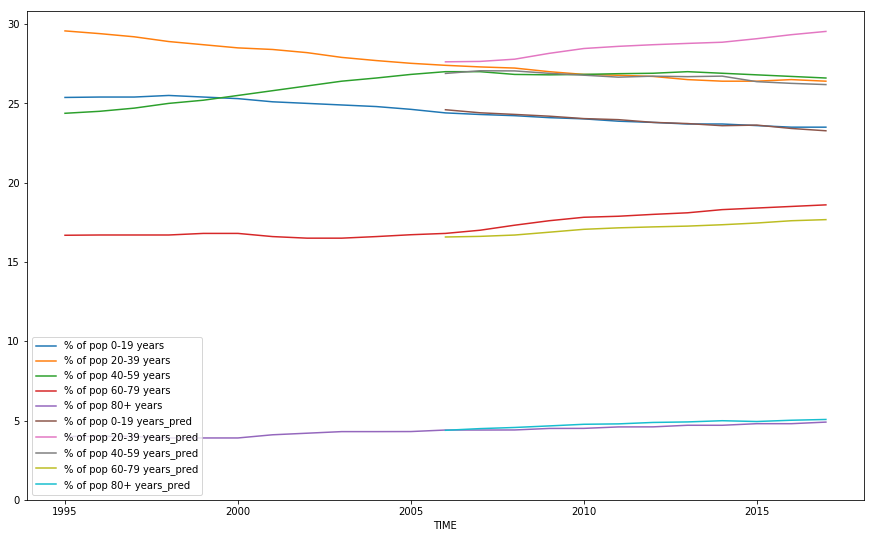

In [8]:
#Make predictions, inverse transform, plot against test data
y_pred = model1.predict(X_test)
resultPlot(y_pred, 1995)

This seems okay. 20-39 and 60-79 have not been predicted well though

###### Let's see what happens if we introduce a 4 year window period

This is a time series after all. Perhaps more than just the prior year had an impact on the current year

In [9]:
#Create 3 sets of shifted columns to get a 4 year period. This is done on the scaled data, not the orignal data!
window = pd.DataFrame(np.concatenate((train_scaled, test_scaled)), columns = df.columns, index = df.index)
for s in [1,2,3]:
    for col, item in df.iteritems():
        window[col + '_' + str(s)] = window[col].shift(s)

window = window.loc[1960:] 
window.head()

,% of pop 0-19 years,% of pop 20-39 years,% of pop 40-59 years,% of pop 60-79 years,% of pop 80+ years,% of pop 0-19 years_1,% of pop 20-39 years_1,% of pop 40-59 years_1,% of pop 60-79 years_1,% of pop 80+ years_1,% of pop 0-19 years_2,% of pop 20-39 years_2,% of pop 40-59 years_2,% of pop 60-79 years_2,% of pop 80+ years_2,% of pop 0-19 years_3,% of pop 20-39 years_3,% of pop 40-59 years_3,% of pop 60-79 years_3,% of pop 80+ years_3
TIME,,,,,,,,,,,,,,,,,,,,
1960,0.810933,0.291646,0.876726,0.142684,0.080322,0.810933,0.334059,0.876726,0.142684,0.003268,0.756362,0.348111,0.931227,0.150775,0.000000,0.740768,0.369211,0.951670,0.086752,0.038335
1961,0.879755,0.195784,0.865785,0.165195,0.078857,0.810933,0.291646,0.876726,0.142684,0.080322,0.810933,0.334059,0.876726,0.142684,0.003268,0.756362,0.348111,0.931227,0.150775,0.000000
1962,0.913557,0.099822,0.873986,0.168358,0.150936,0.879755,0.195784,0.865785,0.165195,0.078857,0.810933,0.291646,0.876726,0.142684,0.080322,0.810933,0.334059,0.876726,0.142684,0.003268
1963,0.932692,0.058062,0.834423,0.251704,0.154143,0.913557,0.099822,0.873986,0.168358,0.150936,0.879755,0.195784,0.865785,0.165195,0.078857,0.810933,0.291646,0.876726,0.142684,0.080322
1964,0.963911,0.036941,0.773033,0.347835,0.115770,0.932692,0.058062,0.834423,0.251704,0.154143,0.913557,0.099822,0.873986,0.168358,0.150936,0.879755,0.195784,0.865785,0.165195,0.078857


In [10]:
#Get the train and test data
split = 2004 

train = window.loc[:split]
test = window.loc[split+1:]

X_train = train.values[:-1]
y_train = train.values[1:,:5] #only need first 5 cols

X_test = test.values[:-1]
y_test = test.values[1:,:5] #only need first 5 cols

#Reshape to appropraite model input: (batch, timesteps, features)
X_train = X_train[:, None]
X_test = X_test[:, None]

print('X_train shape: {}'.format(X_train.shape))

X_train shape: (44, 1, 20)


In [11]:
#make model
model2 = makeModel(1,20,5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 16)             2368      
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 32)             6272      
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 11,861
Trainable params: 11,861
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fit model
model2.fit(X_train, y_train, epochs = 4000)

Epoch 1/4000
44/44 [==============================] - 2s 42ms/step - loss: 0.3992
Epoch 2/4000
44/44 [==============================] - 0s 182us/step - loss: 0.3960
Epoch 3/4000
44/44 [==============================] - 0s 204us/step - loss: 0.3928
Epoch 4/4000
44/44 [==============================] - 0s 204us/step - loss: 0.3897
Epoch 5/4000
44/44 [==============================] - 0s 136us/step - loss: 0.3865
Epoch 6/4000
44/44 [==============================] - 0s 204us/step - loss: 0.3833
Epoch 7/4000
44/44 [==============================] - 0s 205us/step - loss: 0.3800
Epoch 8/4000
44/44 [==============================] - 0s 204us/step - loss: 0.3767
Epoch 9/4000
44/44 [==============================] - 0s 159us/step - loss: 0.3732
Epoch 10/4000
44/44 [==============================] - 0s 204us/step - loss: 0.3697
Epoch 11/4000
44/44 [==============================] - 0s 159us/step - loss: 0.3661
Epoch 12/4000
44/44 [==============================] - 0s 159us/step - loss: 0.3624
Ep

44/44 [==============================] - 0s 182us/step - loss: 0.0147
Epoch 99/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0141
Epoch 100/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0136
Epoch 101/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0131
Epoch 102/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0127
Epoch 103/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0123
Epoch 104/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0118
Epoch 105/4000
44/44 [==============================] - 0s 182us/step - loss: 0.0114
Epoch 106/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0109
Epoch 107/4000
44/44 [==============================] - 0s 182us/step - loss: 0.0107
Epoch 108/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0104
Epoch 109/4000
44/44 [==============================] - 0s 182us/step - loss: 0.0

44/44 [==============================] - 0s 136us/step - loss: 0.0026
Epoch 195/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0026
Epoch 196/4000
44/44 [==============================] - 0s 114us/step - loss: 0.0025
Epoch 197/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 198/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0025
Epoch 199/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0024
Epoch 200/4000
44/44 [==============================] - 0s 204us/step - loss: 0.0024
Epoch 201/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0024
Epoch 202/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0024
Epoch 203/4000
44/44 [==============================] - 0s 182us/step - loss: 0.0024
Epoch 204/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0023
Epoch 205/4000
44/44 [==============================] - 0s 204us/step - loss: 0.

44/44 [==============================] - 0s 136us/step - loss: 0.0013
Epoch 291/4000
44/44 [==============================] - 0s 114us/step - loss: 0.0013
Epoch 292/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0012
Epoch 293/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0013
Epoch 294/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 295/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 296/4000
44/44 [==============================] - 0s 182us/step - loss: 0.0012
Epoch 297/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0012
Epoch 298/4000
44/44 [==============================] - 0s 159us/step - loss: 0.0012
Epoch 299/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 300/4000
44/44 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 301/4000
44/44 [==============================] - 0s 136us/step - loss: 0.

44/44 [==============================] - 0s 159us/step - loss: 8.8106e-04
Epoch 386/4000
44/44 [==============================] - 0s 227us/step - loss: 8.8702e-04
Epoch 387/4000
44/44 [==============================] - 0s 159us/step - loss: 8.8023e-04
Epoch 388/4000
44/44 [==============================] - 0s 182us/step - loss: 8.7637e-04
Epoch 389/4000
44/44 [==============================] - 0s 136us/step - loss: 8.8530e-04
Epoch 390/4000
44/44 [==============================] - 0s 159us/step - loss: 8.7854e-04
Epoch 391/4000
44/44 [==============================] - 0s 159us/step - loss: 8.9282e-04
Epoch 392/4000
44/44 [==============================] - 0s 182us/step - loss: 8.6476e-04
Epoch 393/4000
44/44 [==============================] - 0s 136us/step - loss: 8.6367e-04
Epoch 394/4000
44/44 [==============================] - 0s 182us/step - loss: 8.9300e-04
Epoch 395/4000
44/44 [==============================] - 0s 136us/step - loss: 8.6359e-04
Epoch 396/4000
44/44 [==============

44/44 [==============================] - 0s 204us/step - loss: 7.4937e-04
Epoch 477/4000
44/44 [==============================] - 0s 182us/step - loss: 7.4076e-04
Epoch 478/4000
44/44 [==============================] - 0s 182us/step - loss: 7.2993e-04
Epoch 479/4000
44/44 [==============================] - 0s 136us/step - loss: 7.4538e-04
Epoch 480/4000
44/44 [==============================] - 0s 182us/step - loss: 7.4857e-04
Epoch 481/4000
44/44 [==============================] - 0s 136us/step - loss: 7.2184e-04
Epoch 482/4000
44/44 [==============================] - 0s 136us/step - loss: 7.3536e-04
Epoch 483/4000
44/44 [==============================] - 0s 159us/step - loss: 7.4972e-04
Epoch 484/4000
44/44 [==============================] - 0s 204us/step - loss: 7.4214e-04
Epoch 485/4000
44/44 [==============================] - 0s 159us/step - loss: 7.4113e-04
Epoch 486/4000
44/44 [==============================] - 0s 159us/step - loss: 7.2059e-04
Epoch 487/4000
44/44 [==============

44/44 [==============================] - 0s 159us/step - loss: 6.6215e-04
Epoch 569/4000
44/44 [==============================] - 0s 159us/step - loss: 6.4169e-04
Epoch 570/4000
44/44 [==============================] - 0s 136us/step - loss: 6.4557e-04
Epoch 571/4000
44/44 [==============================] - 0s 159us/step - loss: 6.5940e-04
Epoch 572/4000
44/44 [==============================] - 0s 182us/step - loss: 6.3695e-04
Epoch 573/4000
44/44 [==============================] - 0s 159us/step - loss: 6.2735e-04
Epoch 574/4000
44/44 [==============================] - 0s 159us/step - loss: 6.2499e-04
Epoch 575/4000
44/44 [==============================] - 0s 182us/step - loss: 6.2338e-04
Epoch 576/4000
44/44 [==============================] - 0s 159us/step - loss: 6.3559e-04
Epoch 577/4000
44/44 [==============================] - 0s 136us/step - loss: 6.2846e-04
Epoch 578/4000
44/44 [==============================] - 0s 182us/step - loss: 6.3438e-04
Epoch 579/4000
44/44 [==============

44/44 [==============================] - 0s 182us/step - loss: 5.5488e-04
Epoch 661/4000
44/44 [==============================] - 0s 182us/step - loss: 5.5705e-04
Epoch 662/4000
44/44 [==============================] - 0s 182us/step - loss: 5.6010e-04
Epoch 663/4000
44/44 [==============================] - 0s 136us/step - loss: 5.5309e-04
Epoch 664/4000
44/44 [==============================] - 0s 136us/step - loss: 5.5876e-04
Epoch 665/4000
44/44 [==============================] - 0s 159us/step - loss: 5.8172e-04
Epoch 666/4000
44/44 [==============================] - 0s 136us/step - loss: 5.8722e-04
Epoch 667/4000
44/44 [==============================] - ETA: 0s - loss: 5.8764e-0 - 0s 159us/step - loss: 5.7790e-04
Epoch 668/4000
44/44 [==============================] - 0s 182us/step - loss: 5.7708e-04
Epoch 669/4000
44/44 [==============================] - 0s 182us/step - loss: 5.7363e-04
Epoch 670/4000
44/44 [==============================] - 0s 159us/step - loss: 5.8835e-04
Epoch 67

44/44 [==============================] - 0s 159us/step - loss: 5.0317e-04
Epoch 752/4000
44/44 [==============================] - 0s 136us/step - loss: 5.1252e-04
Epoch 753/4000
44/44 [==============================] - 0s 136us/step - loss: 4.9466e-04
Epoch 754/4000
44/44 [==============================] - ETA: 0s - loss: 4.8276e-0 - 0s 182us/step - loss: 4.9151e-04
Epoch 755/4000
44/44 [==============================] - 0s 204us/step - loss: 5.0437e-04
Epoch 756/4000
44/44 [==============================] - 0s 182us/step - loss: 5.1034e-04
Epoch 757/4000
44/44 [==============================] - 0s 136us/step - loss: 5.0098e-04
Epoch 758/4000
44/44 [==============================] - 0s 182us/step - loss: 4.9896e-04
Epoch 759/4000
44/44 [==============================] - 0s 159us/step - loss: 4.9942e-04
Epoch 760/4000
44/44 [==============================] - 0s 182us/step - loss: 4.9120e-04
Epoch 761/4000
44/44 [==============================] - 0s 136us/step - loss: 4.8933e-04
Epoch 76

44/44 [==============================] - 0s 159us/step - loss: 4.7542e-04
Epoch 843/4000
44/44 [==============================] - 0s 182us/step - loss: 4.5996e-04
Epoch 844/4000
44/44 [==============================] - 0s 136us/step - loss: 4.5168e-04
Epoch 845/4000
44/44 [==============================] - 0s 182us/step - loss: 4.6466e-04
Epoch 846/4000
44/44 [==============================] - 0s 136us/step - loss: 4.6075e-04
Epoch 847/4000
44/44 [==============================] - 0s 182us/step - loss: 4.5912e-04
Epoch 848/4000
44/44 [==============================] - 0s 136us/step - loss: 4.4927e-04
Epoch 849/4000
44/44 [==============================] - 0s 159us/step - loss: 4.5103e-04
Epoch 850/4000
44/44 [==============================] - 0s 159us/step - loss: 4.6359e-04
Epoch 851/4000
44/44 [==============================] - 0s 159us/step - loss: 4.5788e-04
Epoch 852/4000
44/44 [==============================] - 0s 136us/step - loss: 4.6218e-04
Epoch 853/4000
44/44 [==============

44/44 [==============================] - 0s 159us/step - loss: 3.9935e-04
Epoch 934/4000
44/44 [==============================] - 0s 136us/step - loss: 4.0911e-04
Epoch 935/4000
44/44 [==============================] - 0s 159us/step - loss: 4.0948e-04
Epoch 936/4000
44/44 [==============================] - 0s 136us/step - loss: 3.9953e-04
Epoch 937/4000
44/44 [==============================] - 0s 204us/step - loss: 4.0159e-04
Epoch 938/4000
44/44 [==============================] - 0s 159us/step - loss: 4.0483e-04
Epoch 939/4000
44/44 [==============================] - 0s 182us/step - loss: 4.0146e-04
Epoch 940/4000
44/44 [==============================] - 0s 159us/step - loss: 3.9507e-04
Epoch 941/4000
44/44 [==============================] - 0s 159us/step - loss: 4.0566e-04
Epoch 942/4000
44/44 [==============================] - 0s 182us/step - loss: 3.9773e-04
Epoch 943/4000
44/44 [==============================] - 0s 159us/step - loss: 3.8906e-04
Epoch 944/4000
44/44 [==============

44/44 [==============================] - 0s 182us/step - loss: 3.5532e-04
Epoch 1025/4000
44/44 [==============================] - 0s 204us/step - loss: 3.5451e-04
Epoch 1026/4000
44/44 [==============================] - 0s 159us/step - loss: 3.6084e-04
Epoch 1027/4000
44/44 [==============================] - 0s 136us/step - loss: 3.5357e-04
Epoch 1028/4000
44/44 [==============================] - 0s 182us/step - loss: 3.6252e-04
Epoch 1029/4000
44/44 [==============================] - 0s 182us/step - loss: 3.5397e-04
Epoch 1030/4000
44/44 [==============================] - 0s 159us/step - loss: 3.5666e-04
Epoch 1031/4000
44/44 [==============================] - 0s 159us/step - loss: 3.5978e-04
Epoch 1032/4000
44/44 [==============================] - 0s 205us/step - loss: 3.5638e-04
Epoch 1033/4000
44/44 [==============================] - 0s 136us/step - loss: 3.5310e-04
Epoch 1034/4000
44/44 [==============================] - 0s 182us/step - loss: 3.5698e-04
Epoch 1035/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 3.2721e-04
Epoch 1116/4000
44/44 [==============================] - 0s 182us/step - loss: 3.1831e-04
Epoch 1117/4000
44/44 [==============================] - 0s 159us/step - loss: 3.3310e-04
Epoch 1118/4000
44/44 [==============================] - 0s 136us/step - loss: 3.3107e-04
Epoch 1119/4000
44/44 [==============================] - 0s 159us/step - loss: 3.3335e-04
Epoch 1120/4000
44/44 [==============================] - 0s 136us/step - loss: 3.2145e-04
Epoch 1121/4000
44/44 [==============================] - 0s 159us/step - loss: 3.2360e-04
Epoch 1122/4000
44/44 [==============================] - 0s 159us/step - loss: 3.2267e-04
Epoch 1123/4000
44/44 [==============================] - 0s 136us/step - loss: 3.1443e-04
Epoch 1124/4000
44/44 [==============================] - 0s 159us/step - loss: 3.1677e-04
Epoch 1125/4000
44/44 [==============================] - 0s 182us/step - loss: 3.1303e-04
Epoch 1126/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 2.9269e-04
Epoch 1207/4000
44/44 [==============================] - 0s 114us/step - loss: 2.8661e-04
Epoch 1208/4000
44/44 [==============================] - 0s 159us/step - loss: 2.8662e-04
Epoch 1209/4000
44/44 [==============================] - 0s 136us/step - loss: 2.8420e-04
Epoch 1210/4000
44/44 [==============================] - 0s 136us/step - loss: 2.9626e-04
Epoch 1211/4000
44/44 [==============================] - 0s 114us/step - loss: 2.8873e-04
Epoch 1212/4000
44/44 [==============================] - 0s 159us/step - loss: 3.0029e-04
Epoch 1213/4000
44/44 [==============================] - 0s 182us/step - loss: 2.8592e-04
Epoch 1214/4000
44/44 [==============================] - 0s 182us/step - loss: 3.0320e-04
Epoch 1215/4000
44/44 [==============================] - 0s 182us/step - loss: 2.9333e-04
Epoch 1216/4000
44/44 [==============================] - 0s 182us/step - loss: 2.9942e-04
Epoch 1217/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 2.6748e-04
Epoch 1298/4000
44/44 [==============================] - 0s 159us/step - loss: 2.7164e-04
Epoch 1299/4000
44/44 [==============================] - 0s 182us/step - loss: 2.7070e-04
Epoch 1300/4000
44/44 [==============================] - 0s 182us/step - loss: 2.7291e-04
Epoch 1301/4000
44/44 [==============================] - 0s 182us/step - loss: 2.6915e-04
Epoch 1302/4000
44/44 [==============================] - 0s 159us/step - loss: 2.7088e-04
Epoch 1303/4000
44/44 [==============================] - 0s 136us/step - loss: 2.9104e-04
Epoch 1304/4000
44/44 [==============================] - 0s 182us/step - loss: 2.6970e-04
Epoch 1305/4000
44/44 [==============================] - 0s 204us/step - loss: 3.0209e-04
Epoch 1306/4000
44/44 [==============================] - 0s 159us/step - loss: 2.6751e-04
Epoch 1307/4000
44/44 [==============================] - 0s 159us/step - loss: 2.8683e-04
Epoch 1308/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 2.6424e-04
Epoch 1388/4000
44/44 [==============================] - 0s 136us/step - loss: 2.5206e-04
Epoch 1389/4000
44/44 [==============================] - 0s 159us/step - loss: 2.5632e-04
Epoch 1390/4000
44/44 [==============================] - 0s 159us/step - loss: 2.4757e-04
Epoch 1391/4000
44/44 [==============================] - 0s 182us/step - loss: 2.5131e-04
Epoch 1392/4000
44/44 [==============================] - 0s 159us/step - loss: 2.5490e-04
Epoch 1393/4000
44/44 [==============================] - 0s 159us/step - loss: 2.4489e-04
Epoch 1394/4000
44/44 [==============================] - 0s 204us/step - loss: 2.5469e-04
Epoch 1395/4000
44/44 [==============================] - 0s 159us/step - loss: 2.3811e-04
Epoch 1396/4000
44/44 [==============================] - 0s 182us/step - loss: 2.7727e-04
Epoch 1397/4000
44/44 [==============================] - 0s 159us/step - loss: 2.5377e-04
Epoch 1398/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 2.4880e-04
Epoch 1478/4000
44/44 [==============================] - 0s 182us/step - loss: 2.3814e-04
Epoch 1479/4000
44/44 [==============================] - 0s 204us/step - loss: 2.3933e-04
Epoch 1480/4000
44/44 [==============================] - 0s 182us/step - loss: 2.4783e-04
Epoch 1481/4000
44/44 [==============================] - 0s 159us/step - loss: 2.4971e-04
Epoch 1482/4000
44/44 [==============================] - 0s 136us/step - loss: 2.4170e-04
Epoch 1483/4000
44/44 [==============================] - 0s 182us/step - loss: 2.4030e-04
Epoch 1484/4000
44/44 [==============================] - 0s 159us/step - loss: 2.3467e-04
Epoch 1485/4000
44/44 [==============================] - 0s 182us/step - loss: 2.3937e-04
Epoch 1486/4000
44/44 [==============================] - 0s 159us/step - loss: 2.3182e-04
Epoch 1487/4000
44/44 [==============================] - 0s 136us/step - loss: 2.3533e-04
Epoch 1488/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 2.3632e-04
Epoch 1569/4000
44/44 [==============================] - 0s 159us/step - loss: 2.3699e-04
Epoch 1570/4000
44/44 [==============================] - 0s 136us/step - loss: 2.2779e-04
Epoch 1571/4000
44/44 [==============================] - 0s 136us/step - loss: 2.3587e-04
Epoch 1572/4000
44/44 [==============================] - 0s 136us/step - loss: 2.2724e-04
Epoch 1573/4000
44/44 [==============================] - 0s 159us/step - loss: 2.2366e-04
Epoch 1574/4000
44/44 [==============================] - 0s 136us/step - loss: 2.1952e-04
Epoch 1575/4000
44/44 [==============================] - 0s 159us/step - loss: 2.3449e-04
Epoch 1576/4000
44/44 [==============================] - 0s 204us/step - loss: 2.2082e-04
Epoch 1577/4000
44/44 [==============================] - 0s 182us/step - loss: 2.4336e-04
Epoch 1578/4000
44/44 [==============================] - 0s 136us/step - loss: 2.2172e-04
Epoch 1579/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 2.3043e-04
Epoch 1660/4000
44/44 [==============================] - 0s 204us/step - loss: 2.1779e-04
Epoch 1661/4000
44/44 [==============================] - 0s 205us/step - loss: 2.2890e-04
Epoch 1662/4000
44/44 [==============================] - 0s 159us/step - loss: 2.4556e-04
Epoch 1663/4000
44/44 [==============================] - 0s 159us/step - loss: 2.2508e-04
Epoch 1664/4000
44/44 [==============================] - 0s 182us/step - loss: 2.4160e-04
Epoch 1665/4000
44/44 [==============================] - 0s 159us/step - loss: 2.1835e-04
Epoch 1666/4000
44/44 [==============================] - 0s 159us/step - loss: 2.1908e-04
Epoch 1667/4000
44/44 [==============================] - 0s 159us/step - loss: 2.1333e-04
Epoch 1668/4000
44/44 [==============================] - 0s 182us/step - loss: 2.1012e-04
Epoch 1669/4000
44/44 [==============================] - 0s 159us/step - loss: 2.1195e-04
Epoch 1670/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 2.2306e-04
Epoch 1750/4000
44/44 [==============================] - 0s 136us/step - loss: 1.9576e-04
Epoch 1751/4000
44/44 [==============================] - 0s 182us/step - loss: 2.2499e-04
Epoch 1752/4000
44/44 [==============================] - 0s 182us/step - loss: 2.3123e-04
Epoch 1753/4000
44/44 [==============================] - 0s 182us/step - loss: 2.0173e-04
Epoch 1754/4000
44/44 [==============================] - 0s 159us/step - loss: 2.4572e-04
Epoch 1755/4000
44/44 [==============================] - 0s 182us/step - loss: 1.8986e-04
Epoch 1756/4000
44/44 [==============================] - 0s 159us/step - loss: 2.4525e-04
Epoch 1757/4000
44/44 [==============================] - 0s 182us/step - loss: 1.9509e-04
Epoch 1758/4000
44/44 [==============================] - 0s 182us/step - loss: 2.2265e-04
Epoch 1759/4000
44/44 [==============================] - 0s 136us/step - loss: 2.1179e-04
Epoch 1760/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 1.8827e-04
Epoch 1841/4000
44/44 [==============================] - 0s 204us/step - loss: 1.8269e-04
Epoch 1842/4000
44/44 [==============================] - 0s 159us/step - loss: 1.9187e-04
Epoch 1843/4000
44/44 [==============================] - 0s 159us/step - loss: 1.9152e-04
Epoch 1844/4000
44/44 [==============================] - 0s 136us/step - loss: 1.9200e-04
Epoch 1845/4000
44/44 [==============================] - 0s 159us/step - loss: 1.8404e-04
Epoch 1846/4000
44/44 [==============================] - 0s 182us/step - loss: 1.9572e-04
Epoch 1847/4000
44/44 [==============================] - 0s 182us/step - loss: 1.8584e-04
Epoch 1848/4000
44/44 [==============================] - 0s 205us/step - loss: 1.8677e-04
Epoch 1849/4000
44/44 [==============================] - 0s 159us/step - loss: 1.9061e-04
Epoch 1850/4000
44/44 [==============================] - 0s 182us/step - loss: 1.8561e-04
Epoch 1851/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 1.9597e-04
Epoch 1932/4000
44/44 [==============================] - 0s 204us/step - loss: 1.9002e-04
Epoch 1933/4000
44/44 [==============================] - 0s 159us/step - loss: 2.0715e-04
Epoch 1934/4000
44/44 [==============================] - 0s 159us/step - loss: 1.9144e-04
Epoch 1935/4000
44/44 [==============================] - 0s 136us/step - loss: 1.9014e-04
Epoch 1936/4000
44/44 [==============================] - 0s 182us/step - loss: 1.8544e-04
Epoch 1937/4000
44/44 [==============================] - 0s 227us/step - loss: 1.9278e-04
Epoch 1938/4000
44/44 [==============================] - 0s 182us/step - loss: 1.8421e-04
Epoch 1939/4000
44/44 [==============================] - 0s 136us/step - loss: 1.8848e-04
Epoch 1940/4000
44/44 [==============================] - 0s 159us/step - loss: 2.0535e-04
Epoch 1941/4000
44/44 [==============================] - 0s 182us/step - loss: 1.9683e-04
Epoch 1942/4000
44/44 [===

44/44 [==============================] - 0s 204us/step - loss: 1.8636e-04
Epoch 2023/4000
44/44 [==============================] - 0s 136us/step - loss: 1.7016e-04
Epoch 2024/4000
44/44 [==============================] - 0s 136us/step - loss: 1.7530e-04
Epoch 2025/4000
44/44 [==============================] - 0s 136us/step - loss: 1.8833e-04
Epoch 2026/4000
44/44 [==============================] - 0s 159us/step - loss: 1.8769e-04
Epoch 2027/4000
44/44 [==============================] - 0s 182us/step - loss: 1.9194e-04
Epoch 2028/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6903e-04
Epoch 2029/4000
44/44 [==============================] - 0s 136us/step - loss: 1.7871e-04
Epoch 2030/4000
44/44 [==============================] - 0s 182us/step - loss: 1.6676e-04
Epoch 2031/4000
44/44 [==============================] - 0s 159us/step - loss: 1.7946e-04
Epoch 2032/4000
44/44 [==============================] - 0s 204us/step - loss: 1.8257e-04
Epoch 2033/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 1.7565e-04
Epoch 2113/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6768e-04
Epoch 2114/4000
44/44 [==============================] - 0s 182us/step - loss: 1.7727e-04
Epoch 2115/4000
44/44 [==============================] - 0s 136us/step - loss: 2.0055e-04
Epoch 2116/4000
44/44 [==============================] - 0s 159us/step - loss: 1.7035e-04
Epoch 2117/4000
44/44 [==============================] - 0s 159us/step - loss: 1.7744e-04
Epoch 2118/4000
44/44 [==============================] - 0s 182us/step - loss: 1.7047e-04
Epoch 2119/4000
44/44 [==============================] - 0s 204us/step - loss: 1.7653e-04
Epoch 2120/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6915e-04
Epoch 2121/4000
44/44 [==============================] - 0s 136us/step - loss: 1.7857e-04
Epoch 2122/4000
44/44 [==============================] - 0s 204us/step - loss: 1.9081e-04
Epoch 2123/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 1.6297e-04
Epoch 2203/4000
44/44 [==============================] - 0s 204us/step - loss: 1.6792e-04
Epoch 2204/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6913e-04
Epoch 2205/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6740e-04
Epoch 2206/4000
44/44 [==============================] - 0s 159us/step - loss: 1.7815e-04
Epoch 2207/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6808e-04
Epoch 2208/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6376e-04
Epoch 2209/4000
44/44 [==============================] - 0s 182us/step - loss: 1.7732e-04
Epoch 2210/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6868e-04
Epoch 2211/4000
44/44 [==============================] - 0s 182us/step - loss: 1.6409e-04
Epoch 2212/4000
44/44 [==============================] - 0s 136us/step - loss: 1.8149e-04
Epoch 2213/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 1.6425e-04
Epoch 2294/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6259e-04
Epoch 2295/4000
44/44 [==============================] - 0s 159us/step - loss: 1.7127e-04
Epoch 2296/4000
44/44 [==============================] - 0s 136us/step - loss: 1.6096e-04
Epoch 2297/4000
44/44 [==============================] - 0s 159us/step - loss: 1.5778e-04
Epoch 2298/4000
44/44 [==============================] - 0s 136us/step - loss: 1.8104e-04
Epoch 2299/4000
44/44 [==============================] - 0s 136us/step - loss: 1.6710e-04
Epoch 2300/4000
44/44 [==============================] - 0s 159us/step - loss: 1.8352e-04
Epoch 2301/4000
44/44 [==============================] - 0s 136us/step - loss: 1.6265e-04
Epoch 2302/4000
44/44 [==============================] - 0s 182us/step - loss: 1.6926e-04
Epoch 2303/4000
44/44 [==============================] - 0s 182us/step - loss: 1.7167e-04
Epoch 2304/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 1.5826e-04
Epoch 2385/4000
44/44 [==============================] - 0s 136us/step - loss: 1.7992e-04
Epoch 2386/4000
44/44 [==============================] - 0s 136us/step - loss: 1.5244e-04
Epoch 2387/4000
44/44 [==============================] - 0s 227us/step - loss: 1.7003e-04
Epoch 2388/4000
44/44 [==============================] - 0s 136us/step - loss: 1.7366e-04
Epoch 2389/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6115e-04
Epoch 2390/4000
44/44 [==============================] - 0s 136us/step - loss: 1.6902e-04
Epoch 2391/4000
44/44 [==============================] - 0s 182us/step - loss: 1.7979e-04
Epoch 2392/4000
44/44 [==============================] - 0s 159us/step - loss: 1.7068e-04
Epoch 2393/4000
44/44 [==============================] - 0s 159us/step - loss: 1.7575e-04
Epoch 2394/4000
44/44 [==============================] - 0s 136us/step - loss: 1.5488e-04
Epoch 2395/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 1.4094e-04
Epoch 2476/4000
44/44 [==============================] - 0s 182us/step - loss: 1.4190e-04
Epoch 2477/4000
44/44 [==============================] - 0s 136us/step - loss: 1.4911e-04
Epoch 2478/4000
44/44 [==============================] - 0s 136us/step - loss: 1.4381e-04
Epoch 2479/4000
44/44 [==============================] - 0s 182us/step - loss: 1.4919e-04
Epoch 2480/4000
44/44 [==============================] - 0s 182us/step - loss: 1.4110e-04
Epoch 2481/4000
44/44 [==============================] - 0s 159us/step - loss: 1.5121e-04
Epoch 2482/4000
44/44 [==============================] - 0s 182us/step - loss: 1.5300e-04
Epoch 2483/4000
44/44 [==============================] - 0s 136us/step - loss: 1.4281e-04
Epoch 2484/4000
44/44 [==============================] - 0s 182us/step - loss: 1.5087e-04
Epoch 2485/4000
44/44 [==============================] - 0s 159us/step - loss: 1.5580e-04
Epoch 2486/4000
44/44 [===

44/44 [==============================] - 0s 204us/step - loss: 1.3308e-04
Epoch 2567/4000
44/44 [==============================] - 0s 182us/step - loss: 1.4704e-04
Epoch 2568/4000
44/44 [==============================] - 0s 159us/step - loss: 1.4561e-04
Epoch 2569/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3110e-04
Epoch 2570/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3770e-04
Epoch 2571/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3314e-04
Epoch 2572/4000
44/44 [==============================] - 0s 204us/step - loss: 1.3561e-04
Epoch 2573/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3174e-04
Epoch 2574/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3319e-04
Epoch 2575/4000
44/44 [==============================] - 0s 182us/step - loss: 1.2924e-04
Epoch 2576/4000
44/44 [==============================] - 0s 182us/step - loss: 1.3125e-04
Epoch 2577/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 1.2828e-04
Epoch 2657/4000
44/44 [==============================] - 0s 159us/step - loss: 1.4149e-04
Epoch 2658/4000
44/44 [==============================] - 0s 205us/step - loss: 1.3003e-04
Epoch 2659/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3530e-04
Epoch 2660/4000
44/44 [==============================] - 0s 159us/step - loss: 1.2921e-04
Epoch 2661/4000
44/44 [==============================] - 0s 159us/step - loss: 1.4652e-04
Epoch 2662/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3195e-04
Epoch 2663/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3731e-04
Epoch 2664/4000
44/44 [==============================] - 0s 182us/step - loss: 1.4587e-04
Epoch 2665/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3779e-04
Epoch 2666/4000
44/44 [==============================] - 0s 205us/step - loss: 1.3768e-04
Epoch 2667/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 1.3408e-04
Epoch 2747/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3933e-04
Epoch 2748/4000
44/44 [==============================] - 0s 159us/step - loss: 1.5900e-04
Epoch 2749/4000
44/44 [==============================] - 0s 182us/step - loss: 1.3438e-04
Epoch 2750/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6547e-04
Epoch 2751/4000
44/44 [==============================] - 0s 182us/step - loss: 1.3968e-04
Epoch 2752/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3829e-04
Epoch 2753/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3529e-04
Epoch 2754/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3291e-04
Epoch 2755/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3544e-04
Epoch 2756/4000
44/44 [==============================] - 0s 159us/step - loss: 1.4706e-04
Epoch 2757/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 1.2252e-04
Epoch 2837/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2531e-04
Epoch 2838/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3079e-04
Epoch 2839/4000
44/44 [==============================] - 0s 159us/step - loss: 1.2852e-04
Epoch 2840/4000
44/44 [==============================] - 0s 159us/step - loss: 1.4696e-04
Epoch 2841/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3337e-04
Epoch 2842/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3612e-04
Epoch 2843/4000
44/44 [==============================] - 0s 182us/step - loss: 1.3777e-04
Epoch 2844/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3785e-04
Epoch 2845/4000
44/44 [==============================] - 0s 159us/step - loss: 1.4157e-04
Epoch 2846/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3288e-04
Epoch 2847/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 1.2688e-04
Epoch 2928/4000
44/44 [==============================] - 0s 204us/step - loss: 1.2217e-04
Epoch 2929/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2572e-04
Epoch 2930/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3057e-04
Epoch 2931/4000
44/44 [==============================] - 0s 182us/step - loss: 1.2339e-04
Epoch 2932/4000
44/44 [==============================] - 0s 182us/step - loss: 1.2498e-04
Epoch 2933/4000
44/44 [==============================] - 0s 159us/step - loss: 1.2110e-04
Epoch 2934/4000
44/44 [==============================] - 0s 136us/step - loss: 1.1780e-04
Epoch 2935/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3168e-04
Epoch 2936/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1464e-04
Epoch 2937/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2209e-04
Epoch 2938/4000
44/44 [===

44/44 [==============================] - 0s 204us/step - loss: 1.1393e-04
Epoch 3019/4000
44/44 [==============================] - 0s 182us/step - loss: 1.1977e-04
Epoch 3020/4000
44/44 [==============================] - 0s 136us/step - loss: 1.4323e-04
Epoch 3021/4000
44/44 [==============================] - 0s 159us/step - loss: 1.4386e-04
Epoch 3022/4000
44/44 [==============================] - 0s 182us/step - loss: 1.1592e-04
Epoch 3023/4000
44/44 [==============================] - 0s 136us/step - loss: 1.4622e-04
Epoch 3024/4000
44/44 [==============================] - 0s 159us/step - loss: 1.6528e-04
Epoch 3025/4000
44/44 [==============================] - 0s 182us/step - loss: 1.2631e-04
Epoch 3026/4000
44/44 [==============================] - 0s 182us/step - loss: 1.3248e-04
Epoch 3027/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2484e-04
Epoch 3028/4000
44/44 [==============================] - 0s 182us/step - loss: 1.3020e-04
Epoch 3029/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 1.1411e-04
Epoch 3110/4000
44/44 [==============================] - 0s 204us/step - loss: 1.0923e-04
Epoch 3111/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0977e-04
Epoch 3112/4000
44/44 [==============================] - 0s 136us/step - loss: 1.0995e-04
Epoch 3113/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1106e-04
Epoch 3114/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0728e-04
Epoch 3115/4000
44/44 [==============================] - 0s 182us/step - loss: 1.0417e-04
Epoch 3116/4000
44/44 [==============================] - 0s 182us/step - loss: 1.1201e-04
Epoch 3117/4000
44/44 [==============================] - 0s 205us/step - loss: 1.1397e-04
Epoch 3118/4000
44/44 [==============================] - 0s 182us/step - loss: 1.1527e-04
Epoch 3119/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1332e-04
Epoch 3120/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 1.3732e-04
Epoch 3200/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1542e-04
Epoch 3201/4000
44/44 [==============================] - 0s 159us/step - loss: 1.2138e-04
Epoch 3202/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3086e-04
Epoch 3203/4000
44/44 [==============================] - 0s 136us/step - loss: 1.1470e-04
Epoch 3204/4000
44/44 [==============================] - 0s 182us/step - loss: 1.1731e-04
Epoch 3205/4000
44/44 [==============================] - 0s 159us/step - loss: 1.2252e-04
Epoch 3206/4000
44/44 [==============================] - 0s 182us/step - loss: 1.2223e-04
Epoch 3207/4000
44/44 [==============================] - 0s 136us/step - loss: 1.3511e-04
Epoch 3208/4000
44/44 [==============================] - 0s 182us/step - loss: 1.3503e-04
Epoch 3209/4000
44/44 [==============================] - 0s 159us/step - loss: 1.3420e-04
Epoch 3210/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 1.3495e-04
Epoch 3290/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0910e-04
Epoch 3291/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1687e-04
Epoch 3292/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2298e-04
Epoch 3293/4000
44/44 [==============================] - 0s 114us/step - loss: 1.2116e-04
Epoch 3294/4000
44/44 [==============================] - 0s 136us/step - loss: 1.1239e-04
Epoch 3295/4000
44/44 [==============================] - 0s 136us/step - loss: 1.1986e-04
Epoch 3296/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2134e-04
Epoch 3297/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1315e-04
Epoch 3298/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1741e-04
Epoch 3299/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1644e-04
Epoch 3300/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 1.0384e-04
Epoch 3381/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1171e-04
Epoch 3382/4000
44/44 [==============================] - 0s 136us/step - loss: 1.1614e-04
Epoch 3383/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0185e-04
Epoch 3384/4000
44/44 [==============================] - 0s 182us/step - loss: 1.1307e-04
Epoch 3385/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0924e-04
Epoch 3386/4000
44/44 [==============================] - 0s 182us/step - loss: 1.1428e-04
Epoch 3387/4000
44/44 [==============================] - 0s 136us/step - loss: 1.0239e-04
Epoch 3388/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2070e-04
Epoch 3389/4000
44/44 [==============================] - 0s 159us/step - loss: 1.2531e-04
Epoch 3390/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1156e-04
Epoch 3391/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 1.0573e-04
Epoch 3472/4000
44/44 [==============================] - 0s 136us/step - loss: 9.6636e-05
Epoch 3473/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0159e-04
Epoch 3474/4000
44/44 [==============================] - 0s 159us/step - loss: 9.8381e-05
Epoch 3475/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0051e-04
Epoch 3476/4000
44/44 [==============================] - 0s 159us/step - loss: 9.9307e-05
Epoch 3477/4000
44/44 [==============================] - 0s 159us/step - loss: 9.4502e-05
Epoch 3478/4000
44/44 [==============================] - 0s 182us/step - loss: 1.0139e-04
Epoch 3479/4000
44/44 [==============================] - 0s 182us/step - loss: 9.4338e-05
Epoch 3480/4000
44/44 [==============================] - 0s 182us/step - loss: 9.5835e-05
Epoch 3481/4000
44/44 [==============================] - 0s 182us/step - loss: 9.3865e-05
Epoch 3482/4000
44/44 [===

44/44 [==============================] - 0s 136us/step - loss: 1.0577e-04
Epoch 3562/4000
44/44 [==============================] - 0s 136us/step - loss: 1.0239e-04
Epoch 3563/4000
44/44 [==============================] - 0s 136us/step - loss: 9.7309e-05
Epoch 3564/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1293e-04
Epoch 3565/4000
44/44 [==============================] - 0s 182us/step - loss: 9.9243e-05
Epoch 3566/4000
44/44 [==============================] - 0s 159us/step - loss: 9.4030e-05
Epoch 3567/4000
44/44 [==============================] - 0s 204us/step - loss: 9.5064e-05
Epoch 3568/4000
44/44 [==============================] - 0s 182us/step - loss: 9.6556e-05
Epoch 3569/4000
44/44 [==============================] - 0s 182us/step - loss: 9.9035e-05
Epoch 3570/4000
44/44 [==============================] - 0s 182us/step - loss: 1.0497e-04
Epoch 3571/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0706e-04
Epoch 3572/4000
44/44 [===

44/44 [==============================] - 0s 159us/step - loss: 1.0047e-04
Epoch 3653/4000
44/44 [==============================] - 0s 136us/step - loss: 1.1297e-04
Epoch 3654/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0285e-04
Epoch 3655/4000
44/44 [==============================] - 0s 159us/step - loss: 9.8537e-05
Epoch 3656/4000
44/44 [==============================] - 0s 136us/step - loss: 9.8121e-05
Epoch 3657/4000
44/44 [==============================] - 0s 182us/step - loss: 1.0057e-04
Epoch 3658/4000
44/44 [==============================] - 0s 182us/step - loss: 9.6949e-05
Epoch 3659/4000
44/44 [==============================] - 0s 182us/step - loss: 9.8113e-05
Epoch 3660/4000
44/44 [==============================] - 0s 159us/step - loss: 9.8944e-05
Epoch 3661/4000
44/44 [==============================] - 0s 159us/step - loss: 9.4660e-05
Epoch 3662/4000
44/44 [==============================] - 0s 159us/step - loss: 1.1520e-04
Epoch 3663/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 1.0800e-04
Epoch 3744/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0028e-04
Epoch 3745/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0599e-04
Epoch 3746/4000
44/44 [==============================] - 0s 136us/step - loss: 1.0305e-04
Epoch 3747/4000
44/44 [==============================] - 0s 136us/step - loss: 1.2058e-04
Epoch 3748/4000
44/44 [==============================] - 0s 136us/step - loss: 9.1890e-05
Epoch 3749/4000
44/44 [==============================] - 0s 159us/step - loss: 9.2788e-05
Epoch 3750/4000
44/44 [==============================] - 0s 136us/step - loss: 1.0420e-04
Epoch 3751/4000
44/44 [==============================] - 0s 182us/step - loss: 1.0095e-04
Epoch 3752/4000
44/44 [==============================] - 0s 182us/step - loss: 9.2470e-05
Epoch 3753/4000
44/44 [==============================] - 0s 159us/step - loss: 9.8904e-05
Epoch 3754/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 8.6150e-05
Epoch 3834/4000
44/44 [==============================] - 0s 159us/step - loss: 9.4348e-05
Epoch 3835/4000
44/44 [==============================] - 0s 159us/step - loss: 8.5838e-05
Epoch 3836/4000
44/44 [==============================] - 0s 159us/step - loss: 8.5573e-05
Epoch 3837/4000
44/44 [==============================] - 0s 182us/step - loss: 9.0352e-05
Epoch 3838/4000
44/44 [==============================] - 0s 136us/step - loss: 8.4557e-05
Epoch 3839/4000
44/44 [==============================] - 0s 182us/step - loss: 8.0407e-05
Epoch 3840/4000
44/44 [==============================] - 0s 182us/step - loss: 9.5398e-05
Epoch 3841/4000
44/44 [==============================] - 0s 136us/step - loss: 8.5341e-05
Epoch 3842/4000
44/44 [==============================] - 0s 136us/step - loss: 8.5387e-05
Epoch 3843/4000
44/44 [==============================] - 0s 182us/step - loss: 9.1224e-05
Epoch 3844/4000
44/44 [===

44/44 [==============================] - 0s 182us/step - loss: 9.4039e-05
Epoch 3925/4000
44/44 [==============================] - 0s 159us/step - loss: 8.5715e-05
Epoch 3926/4000
44/44 [==============================] - 0s 136us/step - loss: 9.2196e-05
Epoch 3927/4000
44/44 [==============================] - 0s 227us/step - loss: 8.9138e-05
Epoch 3928/4000
44/44 [==============================] - 0s 182us/step - loss: 9.2173e-05
Epoch 3929/4000
44/44 [==============================] - 0s 136us/step - loss: 9.4588e-05
Epoch 3930/4000
44/44 [==============================] - 0s 159us/step - loss: 9.3735e-05
Epoch 3931/4000
44/44 [==============================] - 0s 136us/step - loss: 8.7282e-05
Epoch 3932/4000
44/44 [==============================] - 0s 182us/step - loss: 9.6496e-05
Epoch 3933/4000
44/44 [==============================] - 0s 159us/step - loss: 1.0373e-04
Epoch 3934/4000
44/44 [==============================] - 0s 159us/step - loss: 9.3772e-05
Epoch 3935/4000
44/44 [===

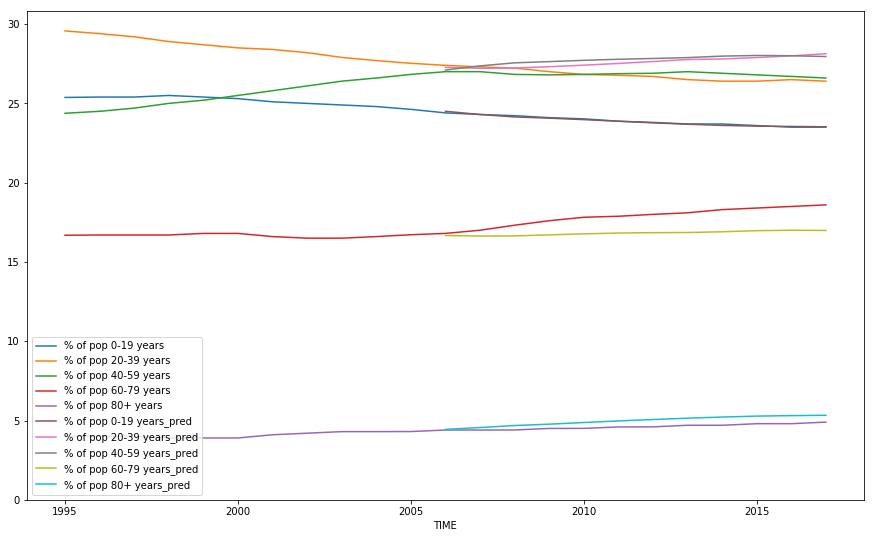

In [13]:
#Make predictions, inverse transform, plot against test data
y_pred = model2.predict(X_test)
resultPlot(y_pred, 1995)

40-59 years is now much worse than before. The other two problematic brakects have not improved either

###### This hasnt really helped. Lets try feeding in 4 year sequences

In [15]:
#Reshape to sequences
X_train = X_train.reshape(44 , 4, 5)
X_test = X_test.reshape(12, 4, 5)

print('X_train shape: {}'.format(X_train.shape))

X_train shape: (44, 4, 5)


In [16]:
#make model
model3 = makeModel(4,5,5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4, 16)             1408      
_________________________________________________________________
lstm_7 (LSTM)                (None, 4, 32)             6272      
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
#fit model
model3.fit(X_train, y_train, epochs = 4000)

Epoch 1/4000
44/44 [==============================] - 2s 53ms/step - loss: 0.4008
Epoch 2/4000
44/44 [==============================] - 0s 273us/step - loss: 0.3963
Epoch 3/4000
44/44 [==============================] - 0s 295us/step - loss: 0.3919
Epoch 4/4000
44/44 [==============================] - 0s 295us/step - loss: 0.3877
Epoch 5/4000
44/44 [==============================] - 0s 295us/step - loss: 0.3834
Epoch 6/4000
44/44 [==============================] - 0s 227us/step - loss: 0.3790
Epoch 7/4000
44/44 [==============================] - 0s 227us/step - loss: 0.3745
Epoch 8/4000
44/44 [==============================] - 0s 318us/step - loss: 0.3698
Epoch 9/4000
44/44 [==============================] - 0s 341us/step - loss: 0.3648
Epoch 10/4000
44/44 [==============================] - 0s 295us/step - loss: 0.3597
Epoch 11/4000
44/44 [==============================] - 0s 250us/step - loss: 0.3543
Epoch 12/4000
44/44 [==============================] - 0s 273us/step - loss: 0.3486
Ep

44/44 [==============================] - 0s 250us/step - loss: 0.0058
Epoch 99/4000
44/44 [==============================] - 0s 250us/step - loss: 0.0056
Epoch 100/4000
44/44 [==============================] - 0s 295us/step - loss: 0.0054
Epoch 101/4000
44/44 [==============================] - 0s 250us/step - loss: 0.0052
Epoch 102/4000
44/44 [==============================] - 0s 250us/step - loss: 0.0050
Epoch 103/4000
44/44 [==============================] - 0s 273us/step - loss: 0.0048
Epoch 104/4000
44/44 [==============================] - 0s 318us/step - loss: 0.0046
Epoch 105/4000
44/44 [==============================] - 0s 341us/step - loss: 0.0044
Epoch 106/4000
44/44 [==============================] - 0s 341us/step - loss: 0.0043
Epoch 107/4000
44/44 [==============================] - 0s 341us/step - loss: 0.0042
Epoch 108/4000
44/44 [==============================] - 0s 318us/step - loss: 0.0040
Epoch 109/4000
44/44 [==============================] - 0s 318us/step - loss: 0.0

44/44 [==============================] - 0s 250us/step - loss: 8.8362e-04
Epoch 194/4000
44/44 [==============================] - 0s 250us/step - loss: 8.8469e-04
Epoch 195/4000
44/44 [==============================] - 0s 250us/step - loss: 8.6109e-04
Epoch 196/4000
44/44 [==============================] - 0s 250us/step - loss: 8.9144e-04
Epoch 197/4000
44/44 [==============================] - 0s 250us/step - loss: 8.5208e-04
Epoch 198/4000
44/44 [==============================] - 0s 318us/step - loss: 8.5583e-04
Epoch 199/4000
44/44 [==============================] - 0s 273us/step - loss: 8.4393e-04
Epoch 200/4000
44/44 [==============================] - 0s 250us/step - loss: 8.3963e-04
Epoch 201/4000
44/44 [==============================] - 0s 250us/step - loss: 8.2981e-04
Epoch 202/4000
44/44 [==============================] - 0s 295us/step - loss: 8.4574e-04
Epoch 203/4000
44/44 [==============================] - 0s 273us/step - loss: 8.2744e-04
Epoch 204/4000
44/44 [==============

44/44 [==============================] - 0s 204us/step - loss: 5.5121e-04
Epoch 286/4000
44/44 [==============================] - 0s 273us/step - loss: 5.4211e-04
Epoch 287/4000
44/44 [==============================] - 0s 250us/step - loss: 5.3888e-04
Epoch 288/4000
44/44 [==============================] - 0s 295us/step - loss: 5.6269e-04
Epoch 289/4000
44/44 [==============================] - 0s 273us/step - loss: 5.4032e-04
Epoch 290/4000
44/44 [==============================] - 0s 295us/step - loss: 5.6607e-04
Epoch 291/4000
44/44 [==============================] - 0s 273us/step - loss: 5.3973e-04
Epoch 292/4000
44/44 [==============================] - 0s 273us/step - loss: 5.4811e-04
Epoch 293/4000
44/44 [==============================] - 0s 273us/step - loss: 5.3941e-04
Epoch 294/4000
44/44 [==============================] - 0s 273us/step - loss: 5.3367e-04
Epoch 295/4000
44/44 [==============================] - 0s 295us/step - loss: 5.5100e-04
Epoch 296/4000
44/44 [==============

44/44 [==============================] - 0s 250us/step - loss: 4.4170e-04
Epoch 378/4000
44/44 [==============================] - 0s 227us/step - loss: 4.4182e-04
Epoch 379/4000
44/44 [==============================] - 0s 227us/step - loss: 4.3842e-04
Epoch 380/4000
44/44 [==============================] - 0s 227us/step - loss: 4.2676e-04
Epoch 381/4000
44/44 [==============================] - 0s 227us/step - loss: 4.4537e-04
Epoch 382/4000
44/44 [==============================] - 0s 227us/step - loss: 4.2493e-04
Epoch 383/4000
44/44 [==============================] - 0s 295us/step - loss: 4.5372e-04
Epoch 384/4000
44/44 [==============================] - 0s 250us/step - loss: 4.3466e-04
Epoch 385/4000
44/44 [==============================] - 0s 250us/step - loss: 4.3256e-04
Epoch 386/4000
44/44 [==============================] - 0s 318us/step - loss: 4.3768e-04
Epoch 387/4000
44/44 [==============================] - 0s 318us/step - loss: 4.3505e-04
Epoch 388/4000
44/44 [==============

44/44 [==============================] - 0s 250us/step - loss: 3.8305e-04
Epoch 469/4000
44/44 [==============================] - 0s 250us/step - loss: 3.7677e-04
Epoch 470/4000
44/44 [==============================] - 0s 295us/step - loss: 3.7871e-04
Epoch 471/4000
44/44 [==============================] - 0s 295us/step - loss: 3.8225e-04
Epoch 472/4000
44/44 [==============================] - 0s 273us/step - loss: 3.7253e-04
Epoch 473/4000
44/44 [==============================] - 0s 250us/step - loss: 3.9261e-04
Epoch 474/4000
44/44 [==============================] - 0s 273us/step - loss: 3.7073e-04
Epoch 475/4000
44/44 [==============================] - 0s 318us/step - loss: 4.0232e-04
Epoch 476/4000
44/44 [==============================] - 0s 295us/step - loss: 3.6963e-04
Epoch 477/4000
44/44 [==============================] - 0s 318us/step - loss: 3.9479e-04
Epoch 478/4000
44/44 [==============================] - 0s 295us/step - loss: 3.8514e-04
Epoch 479/4000
44/44 [==============

44/44 [==============================] - 0s 227us/step - loss: 3.8677e-04
Epoch 561/4000
44/44 [==============================] - 0s 227us/step - loss: 3.4199e-04
Epoch 562/4000
44/44 [==============================] - 0s 227us/step - loss: 3.9583e-04
Epoch 563/4000
44/44 [==============================] - 0s 272us/step - loss: 3.5760e-04
Epoch 564/4000
44/44 [==============================] - 0s 250us/step - loss: 3.4261e-04
Epoch 565/4000
44/44 [==============================] - 0s 227us/step - loss: 3.6919e-04
Epoch 566/4000
44/44 [==============================] - 0s 273us/step - loss: 3.3422e-04
Epoch 567/4000
44/44 [==============================] - 0s 341us/step - loss: 3.7202e-04
Epoch 568/4000
44/44 [==============================] - 0s 250us/step - loss: 3.5751e-04
Epoch 569/4000
44/44 [==============================] - 0s 318us/step - loss: 3.5129e-04
Epoch 570/4000
44/44 [==============================] - 0s 273us/step - loss: 3.6575e-04
Epoch 571/4000
44/44 [==============

44/44 [==============================] - 0s 250us/step - loss: 3.2848e-04
Epoch 653/4000
44/44 [==============================] - 0s 295us/step - loss: 3.3018e-04
Epoch 654/4000
44/44 [==============================] - 0s 318us/step - loss: 3.2582e-04
Epoch 655/4000
44/44 [==============================] - 0s 341us/step - loss: 3.2567e-04
Epoch 656/4000
44/44 [==============================] - 0s 273us/step - loss: 3.3346e-04
Epoch 657/4000
44/44 [==============================] - 0s 273us/step - loss: 3.3408e-04
Epoch 658/4000
44/44 [==============================] - 0s 272us/step - loss: 3.3150e-04
Epoch 659/4000
44/44 [==============================] - 0s 250us/step - loss: 3.3754e-04
Epoch 660/4000
44/44 [==============================] - 0s 295us/step - loss: 3.3868e-04
Epoch 661/4000
44/44 [==============================] - 0s 318us/step - loss: 3.3753e-04
Epoch 662/4000
44/44 [==============================] - 0s 250us/step - loss: 3.2744e-04
Epoch 663/4000
44/44 [==============

44/44 [==============================] - 0s 273us/step - loss: 3.1934e-04
Epoch 745/4000
44/44 [==============================] - 0s 295us/step - loss: 3.4708e-04
Epoch 746/4000
44/44 [==============================] - 0s 318us/step - loss: 3.4042e-04
Epoch 747/4000
44/44 [==============================] - 0s 295us/step - loss: 3.1924e-04
Epoch 748/4000
44/44 [==============================] - 0s 295us/step - loss: 3.5249e-04
Epoch 749/4000
44/44 [==============================] - 0s 273us/step - loss: 3.3327e-04
Epoch 750/4000
44/44 [==============================] - 0s 250us/step - loss: 3.1621e-04
Epoch 751/4000
44/44 [==============================] - 0s 250us/step - loss: 3.2536e-04
Epoch 752/4000
44/44 [==============================] - 0s 295us/step - loss: 3.0960e-04
Epoch 753/4000
44/44 [==============================] - 0s 250us/step - loss: 3.0095e-04
Epoch 754/4000
44/44 [==============================] - 0s 318us/step - loss: 3.1113e-04
Epoch 755/4000
44/44 [==============

44/44 [==============================] - 0s 227us/step - loss: 3.0014e-04
Epoch 837/4000
44/44 [==============================] - 0s 227us/step - loss: 3.0030e-04
Epoch 838/4000
44/44 [==============================] - 0s 273us/step - loss: 3.0035e-04
Epoch 839/4000
44/44 [==============================] - 0s 341us/step - loss: 2.9782e-04
Epoch 840/4000
44/44 [==============================] - 0s 273us/step - loss: 2.9917e-04
Epoch 841/4000
44/44 [==============================] - 0s 273us/step - loss: 3.1016e-04
Epoch 842/4000
44/44 [==============================] - 0s 273us/step - loss: 2.9366e-04
Epoch 843/4000
44/44 [==============================] - 0s 250us/step - loss: 2.9829e-04
Epoch 844/4000
44/44 [==============================] - 0s 273us/step - loss: 3.1372e-04
Epoch 845/4000
44/44 [==============================] - 0s 295us/step - loss: 2.9858e-04
Epoch 846/4000
44/44 [==============================] - 0s 227us/step - loss: 2.9604e-04
Epoch 847/4000
44/44 [==============

44/44 [==============================] - 0s 273us/step - loss: 2.7377e-04
Epoch 928/4000
44/44 [==============================] - 0s 295us/step - loss: 3.0866e-04
Epoch 929/4000
44/44 [==============================] - 0s 341us/step - loss: 3.0428e-04
Epoch 930/4000
44/44 [==============================] - 0s 250us/step - loss: 2.9919e-04
Epoch 931/4000
44/44 [==============================] - 0s 273us/step - loss: 2.9972e-04
Epoch 932/4000
44/44 [==============================] - 0s 295us/step - loss: 3.0581e-04
Epoch 933/4000
44/44 [==============================] - 0s 273us/step - loss: 3.1115e-04
Epoch 934/4000
44/44 [==============================] - 0s 250us/step - loss: 2.7809e-04
Epoch 935/4000
44/44 [==============================] - 0s 250us/step - loss: 2.9403e-04
Epoch 936/4000
44/44 [==============================] - 0s 295us/step - loss: 2.7501e-04
Epoch 937/4000
44/44 [==============================] - 0s 318us/step - loss: 2.8619e-04
Epoch 938/4000
44/44 [==============

44/44 [==============================] - 0s 364us/step - loss: 2.7871e-04
Epoch 1020/4000
44/44 [==============================] - 0s 318us/step - loss: 2.8229e-04
Epoch 1021/4000
44/44 [==============================] - 0s 295us/step - loss: 2.7868e-04
Epoch 1022/4000
44/44 [==============================] - 0s 318us/step - loss: 2.7572e-04
Epoch 1023/4000
44/44 [==============================] - 0s 227us/step - loss: 2.7674e-04
Epoch 1024/4000
44/44 [==============================] - 0s 250us/step - loss: 2.8400e-04
Epoch 1025/4000
44/44 [==============================] - 0s 273us/step - loss: 2.7208e-04
Epoch 1026/4000
44/44 [==============================] - 0s 295us/step - loss: 3.0416e-04
Epoch 1027/4000
44/44 [==============================] - 0s 250us/step - loss: 2.8946e-04
Epoch 1028/4000
44/44 [==============================] - 0s 364us/step - loss: 2.9012e-04
Epoch 1029/4000
44/44 [==============================] - 0s 273us/step - loss: 2.7861e-04
Epoch 1030/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 2.7978e-04
Epoch 1111/4000
44/44 [==============================] - 0s 341us/step - loss: 2.7391e-04
Epoch 1112/4000
44/44 [==============================] - 0s 341us/step - loss: 2.7533e-04
Epoch 1113/4000
44/44 [==============================] - 0s 273us/step - loss: 2.8305e-04
Epoch 1114/4000
44/44 [==============================] - 0s 295us/step - loss: 2.7926e-04
Epoch 1115/4000
44/44 [==============================] - 0s 295us/step - loss: 2.7569e-04
Epoch 1116/4000
44/44 [==============================] - 0s 318us/step - loss: 2.6937e-04
Epoch 1117/4000
44/44 [==============================] - 0s 227us/step - loss: 3.0607e-04
Epoch 1118/4000
44/44 [==============================] - 0s 318us/step - loss: 2.7524e-04
Epoch 1119/4000
44/44 [==============================] - 0s 318us/step - loss: 2.7452e-04
Epoch 1120/4000
44/44 [==============================] - 0s 250us/step - loss: 2.7286e-04
Epoch 1121/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 2.6317e-04
Epoch 1202/4000
44/44 [==============================] - 0s 227us/step - loss: 2.4771e-04
Epoch 1203/4000
44/44 [==============================] - 0s 250us/step - loss: 3.0550e-04
Epoch 1204/4000
44/44 [==============================] - 0s 273us/step - loss: 2.8578e-04
Epoch 1205/4000
44/44 [==============================] - 0s 227us/step - loss: 2.6328e-04
Epoch 1206/4000
44/44 [==============================] - 0s 227us/step - loss: 2.6962e-04
Epoch 1207/4000
44/44 [==============================] - 0s 250us/step - loss: 3.0828e-04
Epoch 1208/4000
44/44 [==============================] - 0s 273us/step - loss: 2.6061e-04
Epoch 1209/4000
44/44 [==============================] - 0s 295us/step - loss: 2.5233e-04
Epoch 1210/4000
44/44 [==============================] - 0s 250us/step - loss: 2.4839e-04
Epoch 1211/4000
44/44 [==============================] - 0s 341us/step - loss: 2.6402e-04
Epoch 1212/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 2.6806e-04
Epoch 1292/4000
44/44 [==============================] - 0s 318us/step - loss: 2.5442e-04
Epoch 1293/4000
44/44 [==============================] - 0s 227us/step - loss: 2.5955e-04
Epoch 1294/4000
44/44 [==============================] - 0s 227us/step - loss: 2.4458e-04
Epoch 1295/4000
44/44 [==============================] - 0s 250us/step - loss: 2.6179e-04
Epoch 1296/4000
44/44 [==============================] - 0s 227us/step - loss: 2.5257e-04
Epoch 1297/4000
44/44 [==============================] - 0s 227us/step - loss: 2.4313e-04
Epoch 1298/4000
44/44 [==============================] - 0s 250us/step - loss: 2.6216e-04
Epoch 1299/4000
44/44 [==============================] - 0s 250us/step - loss: 2.5373e-04
Epoch 1300/4000
44/44 [==============================] - 0s 273us/step - loss: 2.5034e-04
Epoch 1301/4000
44/44 [==============================] - 0s 341us/step - loss: 2.4930e-04
Epoch 1302/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 2.4145e-04
Epoch 1382/4000
44/44 [==============================] - 0s 273us/step - loss: 2.4599e-04
Epoch 1383/4000
44/44 [==============================] - 0s 273us/step - loss: 2.5180e-04
Epoch 1384/4000
44/44 [==============================] - 0s 364us/step - loss: 2.6387e-04
Epoch 1385/4000
44/44 [==============================] - 0s 341us/step - loss: 2.4051e-04
Epoch 1386/4000
44/44 [==============================] - 0s 273us/step - loss: 2.3683e-04
Epoch 1387/4000
44/44 [==============================] - 0s 318us/step - loss: 2.5736e-04
Epoch 1388/4000
44/44 [==============================] - 0s 295us/step - loss: 2.4886e-04
Epoch 1389/4000
44/44 [==============================] - 0s 273us/step - loss: 2.4146e-04
Epoch 1390/4000
44/44 [==============================] - 0s 273us/step - loss: 2.3839e-04
Epoch 1391/4000
44/44 [==============================] - 0s 295us/step - loss: 2.3743e-04
Epoch 1392/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 2.7867e-04
Epoch 1472/4000
44/44 [==============================] - 0s 227us/step - loss: 3.0227e-04
Epoch 1473/4000
44/44 [==============================] - 0s 227us/step - loss: 2.5707e-04
Epoch 1474/4000
44/44 [==============================] - 0s 318us/step - loss: 2.8252e-04
Epoch 1475/4000
44/44 [==============================] - 0s 250us/step - loss: 2.5469e-04
Epoch 1476/4000
44/44 [==============================] - 0s 364us/step - loss: 2.7150e-04
Epoch 1477/4000
44/44 [==============================] - 0s 318us/step - loss: 2.6539e-04
Epoch 1478/4000
44/44 [==============================] - 0s 318us/step - loss: 2.4145e-04
Epoch 1479/4000
44/44 [==============================] - 0s 295us/step - loss: 2.4522e-04
Epoch 1480/4000
44/44 [==============================] - 0s 250us/step - loss: 2.3676e-04
Epoch 1481/4000
44/44 [==============================] - 0s 295us/step - loss: 2.3643e-04
Epoch 1482/4000
44/44 [===

44/44 [==============================] - 0s 250us/step - loss: 2.5749e-04
Epoch 1562/4000
44/44 [==============================] - 0s 227us/step - loss: 2.3717e-04
Epoch 1563/4000
44/44 [==============================] - 0s 250us/step - loss: 2.2845e-04
Epoch 1564/4000
44/44 [==============================] - 0s 227us/step - loss: 2.4112e-04
Epoch 1565/4000
44/44 [==============================] - 0s 227us/step - loss: 2.2935e-04
Epoch 1566/4000
44/44 [==============================] - 0s 250us/step - loss: 2.6727e-04
Epoch 1567/4000
44/44 [==============================] - 0s 409us/step - loss: 2.3453e-04
Epoch 1568/4000
44/44 [==============================] - 0s 273us/step - loss: 2.2256e-04
Epoch 1569/4000
44/44 [==============================] - 0s 273us/step - loss: 2.4897e-04
Epoch 1570/4000
44/44 [==============================] - 0s 250us/step - loss: 2.6155e-04
Epoch 1571/4000
44/44 [==============================] - 0s 273us/step - loss: 2.3446e-04
Epoch 1572/4000
44/44 [===

44/44 [==============================] - 0s 318us/step - loss: 2.1481e-04
Epoch 1652/4000
44/44 [==============================] - 0s 273us/step - loss: 2.1715e-04
Epoch 1653/4000
44/44 [==============================] - 0s 227us/step - loss: 2.2357e-04
Epoch 1654/4000
44/44 [==============================] - 0s 227us/step - loss: 2.2415e-04
Epoch 1655/4000
44/44 [==============================] - 0s 273us/step - loss: 2.1661e-04
Epoch 1656/4000
44/44 [==============================] - 0s 295us/step - loss: 2.1583e-04
Epoch 1657/4000
44/44 [==============================] - 0s 295us/step - loss: 2.2035e-04
Epoch 1658/4000
44/44 [==============================] - 0s 295us/step - loss: 2.4022e-04
Epoch 1659/4000
44/44 [==============================] - 0s 295us/step - loss: 2.1958e-04
Epoch 1660/4000
44/44 [==============================] - 0s 250us/step - loss: 2.2061e-04
Epoch 1661/4000
44/44 [==============================] - 0s 273us/step - loss: 2.2477e-04
Epoch 1662/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 2.1331e-04
Epoch 1743/4000
44/44 [==============================] - 0s 227us/step - loss: 2.3518e-04
Epoch 1744/4000
44/44 [==============================] - 0s 227us/step - loss: 2.1921e-04
Epoch 1745/4000
44/44 [==============================] - 0s 227us/step - loss: 2.1386e-04
Epoch 1746/4000
44/44 [==============================] - 0s 318us/step - loss: 2.2590e-04
Epoch 1747/4000
44/44 [==============================] - 0s 227us/step - loss: 2.1236e-04
Epoch 1748/4000
44/44 [==============================] - 0s 204us/step - loss: 2.2749e-04
Epoch 1749/4000
44/44 [==============================] - 0s 227us/step - loss: 2.3075e-04
Epoch 1750/4000
44/44 [==============================] - 0s 272us/step - loss: 2.1450e-04
Epoch 1751/4000
44/44 [==============================] - 0s 227us/step - loss: 2.1666e-04
Epoch 1752/4000
44/44 [==============================] - 0s 273us/step - loss: 2.4114e-04
Epoch 1753/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 2.2157e-04
Epoch 1833/4000
44/44 [==============================] - 0s 227us/step - loss: 2.4058e-04
Epoch 1834/4000
44/44 [==============================] - 0s 295us/step - loss: 2.0825e-04
Epoch 1835/4000
44/44 [==============================] - 0s 295us/step - loss: 2.1365e-04
Epoch 1836/4000
44/44 [==============================] - 0s 250us/step - loss: 2.1173e-04
Epoch 1837/4000
44/44 [==============================] - 0s 295us/step - loss: 2.1674e-04
Epoch 1838/4000
44/44 [==============================] - 0s 318us/step - loss: 2.1240e-04
Epoch 1839/4000
44/44 [==============================] - 0s 295us/step - loss: 2.0701e-04
Epoch 1840/4000
44/44 [==============================] - 0s 250us/step - loss: 2.0775e-04
Epoch 1841/4000
44/44 [==============================] - 0s 250us/step - loss: 2.1945e-04
Epoch 1842/4000
44/44 [==============================] - 0s 250us/step - loss: 2.0593e-04
Epoch 1843/4000
44/44 [===

44/44 [==============================] - 0s 295us/step - loss: 1.9289e-04
Epoch 1924/4000
44/44 [==============================] - 0s 227us/step - loss: 1.8654e-04
Epoch 1925/4000
44/44 [==============================] - 0s 250us/step - loss: 1.9216e-04
Epoch 1926/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9208e-04
Epoch 1927/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9028e-04
Epoch 1928/4000
44/44 [==============================] - 0s 318us/step - loss: 2.2557e-04
Epoch 1929/4000
44/44 [==============================] - 0s 341us/step - loss: 2.1927e-04
Epoch 1930/4000
44/44 [==============================] - 0s 318us/step - loss: 1.9609e-04
Epoch 1931/4000
44/44 [==============================] - 0s 273us/step - loss: 2.0208e-04
Epoch 1932/4000
44/44 [==============================] - 0s 250us/step - loss: 2.1402e-04
Epoch 1933/4000
44/44 [==============================] - 0s 273us/step - loss: 2.1299e-04
Epoch 1934/4000
44/44 [===

44/44 [==============================] - 0s 295us/step - loss: 1.8187e-04
Epoch 2015/4000
44/44 [==============================] - 0s 295us/step - loss: 1.8231e-04
Epoch 2016/4000
44/44 [==============================] - 0s 295us/step - loss: 1.8946e-04
Epoch 2017/4000
44/44 [==============================] - 0s 227us/step - loss: 1.9816e-04
Epoch 2018/4000
44/44 [==============================] - 0s 273us/step - loss: 1.9064e-04
Epoch 2019/4000
44/44 [==============================] - 0s 273us/step - loss: 1.9863e-04
Epoch 2020/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9853e-04
Epoch 2021/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9529e-04
Epoch 2022/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9167e-04
Epoch 2023/4000
44/44 [==============================] - 0s 250us/step - loss: 1.9131e-04
Epoch 2024/4000
44/44 [==============================] - 0s 250us/step - loss: 1.8521e-04
Epoch 2025/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 1.8315e-04
Epoch 2105/4000
44/44 [==============================] - 0s 250us/step - loss: 1.7893e-04
Epoch 2106/4000
44/44 [==============================] - 0s 273us/step - loss: 1.8355e-04
Epoch 2107/4000
44/44 [==============================] - 0s 273us/step - loss: 1.8444e-04
Epoch 2108/4000
44/44 [==============================] - 0s 227us/step - loss: 2.0218e-04
Epoch 2109/4000
44/44 [==============================] - 0s 227us/step - loss: 2.0156e-04
Epoch 2110/4000
44/44 [==============================] - 0s 273us/step - loss: 2.0105e-04
Epoch 2111/4000
44/44 [==============================] - 0s 318us/step - loss: 1.9962e-04
Epoch 2112/4000
44/44 [==============================] - 0s 295us/step - loss: 2.1014e-04
Epoch 2113/4000
44/44 [==============================] - 0s 341us/step - loss: 1.8135e-04
Epoch 2114/4000
44/44 [==============================] - 0s 295us/step - loss: 2.4876e-04
Epoch 2115/4000
44/44 [===

44/44 [==============================] - 0s 250us/step - loss: 1.6813e-04
Epoch 2195/4000
44/44 [==============================] - 0s 250us/step - loss: 1.7088e-04
Epoch 2196/4000
44/44 [==============================] - 0s 227us/step - loss: 1.7717e-04
Epoch 2197/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6587e-04
Epoch 2198/4000
44/44 [==============================] - 0s 295us/step - loss: 1.7085e-04
Epoch 2199/4000
44/44 [==============================] - 0s 295us/step - loss: 1.8484e-04
Epoch 2200/4000
44/44 [==============================] - 0s 295us/step - loss: 1.6940e-04
Epoch 2201/4000
44/44 [==============================] - 0s 273us/step - loss: 1.7444e-04
Epoch 2202/4000
44/44 [==============================] - 0s 273us/step - loss: 1.7109e-04
Epoch 2203/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6292e-04
Epoch 2204/4000
44/44 [==============================] - 0s 273us/step - loss: 1.7003e-04
Epoch 2205/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 1.6844e-04
Epoch 2285/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9054e-04
Epoch 2286/4000
44/44 [==============================] - 0s 318us/step - loss: 1.7491e-04
Epoch 2287/4000
44/44 [==============================] - 0s 318us/step - loss: 1.6433e-04
Epoch 2288/4000
44/44 [==============================] - 0s 318us/step - loss: 1.7676e-04
Epoch 2289/4000
44/44 [==============================] - 0s 341us/step - loss: 1.7437e-04
Epoch 2290/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6929e-04
Epoch 2291/4000
44/44 [==============================] - 0s 273us/step - loss: 1.9072e-04
Epoch 2292/4000
44/44 [==============================] - 0s 273us/step - loss: 1.9498e-04
Epoch 2293/4000
44/44 [==============================] - 0s 250us/step - loss: 2.0506e-04
Epoch 2294/4000
44/44 [==============================] - 0s 227us/step - loss: 2.1371e-04
Epoch 2295/4000
44/44 [===

44/44 [==============================] - 0s 295us/step - loss: 1.8585e-04
Epoch 2376/4000
44/44 [==============================] - 0s 250us/step - loss: 1.7479e-04
Epoch 2377/4000
44/44 [==============================] - 0s 227us/step - loss: 1.6664e-04
Epoch 2378/4000
44/44 [==============================] - 0s 273us/step - loss: 1.7028e-04
Epoch 2379/4000
44/44 [==============================] - 0s 295us/step - loss: 1.6539e-04
Epoch 2380/4000
44/44 [==============================] - 0s 250us/step - loss: 1.7153e-04
Epoch 2381/4000
44/44 [==============================] - 0s 295us/step - loss: 1.7890e-04
Epoch 2382/4000
44/44 [==============================] - 0s 295us/step - loss: 1.7191e-04
Epoch 2383/4000
44/44 [==============================] - 0s 295us/step - loss: 1.6970e-04
Epoch 2384/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6872e-04
Epoch 2385/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6104e-04
Epoch 2386/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 1.5926e-04
Epoch 2467/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6030e-04
Epoch 2468/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5867e-04
Epoch 2469/4000
44/44 [==============================] - 0s 273us/step - loss: 1.5039e-04
Epoch 2470/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5569e-04
Epoch 2471/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6834e-04
Epoch 2472/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6775e-04
Epoch 2473/4000
44/44 [==============================] - 0s 341us/step - loss: 1.5882e-04
Epoch 2474/4000
44/44 [==============================] - 0s 250us/step - loss: 1.7173e-04
Epoch 2475/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6690e-04
Epoch 2476/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6237e-04
Epoch 2477/4000
44/44 [===

44/44 [==============================] - 0s 295us/step - loss: 1.6717e-04
Epoch 2558/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6948e-04
Epoch 2559/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6599e-04
Epoch 2560/4000
44/44 [==============================] - 0s 318us/step - loss: 1.5843e-04
Epoch 2561/4000
44/44 [==============================] - 0s 273us/step - loss: 1.7600e-04
Epoch 2562/4000
44/44 [==============================] - 0s 318us/step - loss: 1.8705e-04
Epoch 2563/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9066e-04
Epoch 2564/4000
44/44 [==============================] - 0s 318us/step - loss: 1.6168e-04
Epoch 2565/4000
44/44 [==============================] - 0s 250us/step - loss: 1.7731e-04
Epoch 2566/4000
44/44 [==============================] - 0s 273us/step - loss: 1.8781e-04
Epoch 2567/4000
44/44 [==============================] - 0s 227us/step - loss: 1.7228e-04
Epoch 2568/4000
44/44 [===

44/44 [==============================] - 0s 250us/step - loss: 1.7923e-04
Epoch 2648/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6095e-04
Epoch 2649/4000
44/44 [==============================] - 0s 318us/step - loss: 1.4821e-04
Epoch 2650/4000
44/44 [==============================] - 0s 295us/step - loss: 1.6520e-04
Epoch 2651/4000
44/44 [==============================] - 0s 227us/step - loss: 1.8304e-04
Epoch 2652/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6792e-04
Epoch 2653/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6058e-04
Epoch 2654/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6533e-04
Epoch 2655/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6032e-04
Epoch 2656/4000
44/44 [==============================] - 0s 273us/step - loss: 1.5737e-04
Epoch 2657/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5817e-04
Epoch 2658/4000
44/44 [===

44/44 [==============================] - 0s 295us/step - loss: 1.5285e-04
Epoch 2739/4000
44/44 [==============================] - 0s 227us/step - loss: 1.7382e-04
Epoch 2740/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4232e-04
Epoch 2741/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5544e-04
Epoch 2742/4000
44/44 [==============================] - 0s 318us/step - loss: 1.4843e-04
Epoch 2743/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4185e-04
Epoch 2744/4000
44/44 [==============================] - 0s 341us/step - loss: 1.6167e-04
Epoch 2745/4000
44/44 [==============================] - 0s 273us/step - loss: 1.4452e-04
Epoch 2746/4000
44/44 [==============================] - 0s 273us/step - loss: 1.4670e-04
Epoch 2747/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5194e-04
Epoch 2748/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4526e-04
Epoch 2749/4000
44/44 [===

Epoch 2829/4000
44/44 [==============================] - 0s 250us/step - loss: 2.7688e-04
Epoch 2830/4000
44/44 [==============================] - 0s 227us/step - loss: 2.3624e-04
Epoch 2831/4000
44/44 [==============================] - 0s 273us/step - loss: 1.9793e-04
Epoch 2832/4000
44/44 [==============================] - 0s 295us/step - loss: 1.8651e-04
Epoch 2833/4000
44/44 [==============================] - 0s 250us/step - loss: 2.2668e-04
Epoch 2834/4000
44/44 [==============================] - 0s 227us/step - loss: 1.8965e-04
Epoch 2835/4000
44/44 [==============================] - 0s 318us/step - loss: 2.1252e-04
Epoch 2836/4000
44/44 [==============================] - 0s 295us/step - loss: 1.8427e-04
Epoch 2837/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5239e-04
Epoch 2838/4000
44/44 [==============================] - 0s 295us/step - loss: 1.7388e-04
Epoch 2839/4000
44/44 [==============================] - 0s 227us/step - loss: 1.5221e-04
Epoch 2840

44/44 [==============================] - 0s 250us/step - loss: 2.3838e-04
Epoch 2921/4000
44/44 [==============================] - 0s 364us/step - loss: 1.7623e-04
Epoch 2922/4000
44/44 [==============================] - 0s 250us/step - loss: 1.9599e-04
Epoch 2923/4000
44/44 [==============================] - 0s 204us/step - loss: 2.1699e-04
Epoch 2924/4000
44/44 [==============================] - 0s 318us/step - loss: 1.6979e-04
Epoch 2925/4000
44/44 [==============================] - 0s 295us/step - loss: 1.6168e-04
Epoch 2926/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5722e-04
Epoch 2927/4000
44/44 [==============================] - 0s 295us/step - loss: 1.8446e-04
Epoch 2928/4000
44/44 [==============================] - 0s 318us/step - loss: 1.5856e-04
Epoch 2929/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4386e-04
Epoch 2930/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4564e-04
Epoch 2931/4000
44/44 [===

44/44 [==============================] - 0s 250us/step - loss: 1.4979e-04
Epoch 3012/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5638e-04
Epoch 3013/4000
44/44 [==============================] - 0s 341us/step - loss: 1.4336e-04
Epoch 3014/4000
44/44 [==============================] - 0s 341us/step - loss: 1.6056e-04
Epoch 3015/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6067e-04
Epoch 3016/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5784e-04
Epoch 3017/4000
44/44 [==============================] - 0s 273us/step - loss: 1.5010e-04
Epoch 3018/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5428e-04
Epoch 3019/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4987e-04
Epoch 3020/4000
44/44 [==============================] - 0s 295us/step - loss: 1.6755e-04
Epoch 3021/4000
44/44 [==============================] - 0s 273us/step - loss: 1.5420e-04
Epoch 3022/4000
44/44 [===

44/44 [==============================] - 0s 295us/step - loss: 1.6377e-04
Epoch 3103/4000
44/44 [==============================] - 0s 227us/step - loss: 1.6207e-04
Epoch 3104/4000
44/44 [==============================] - 0s 273us/step - loss: 1.4820e-04
Epoch 3105/4000
44/44 [==============================] - 0s 250us/step - loss: 1.3581e-04
Epoch 3106/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5693e-04
Epoch 3107/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4287e-04
Epoch 3108/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5952e-04
Epoch 3109/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4475e-04
Epoch 3110/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4742e-04
Epoch 3111/4000
44/44 [==============================] - 0s 318us/step - loss: 1.4219e-04
Epoch 3112/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4118e-04
Epoch 3113/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 1.8769e-04
Epoch 3193/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5835e-04
Epoch 3194/4000
44/44 [==============================] - 0s 249us/step - loss: 1.5328e-04
Epoch 3195/4000
44/44 [==============================] - 0s 227us/step - loss: 1.7408e-04
Epoch 3196/4000
44/44 [==============================] - 0s 273us/step - loss: 1.8223e-04
Epoch 3197/4000
44/44 [==============================] - 0s 318us/step - loss: 1.7586e-04
Epoch 3198/4000
44/44 [==============================] - 0s 318us/step - loss: 1.6486e-04
Epoch 3199/4000
44/44 [==============================] - 0s 295us/step - loss: 1.9535e-04
Epoch 3200/4000
44/44 [==============================] - 0s 295us/step - loss: 1.7278e-04
Epoch 3201/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6383e-04
Epoch 3202/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6714e-04
Epoch 3203/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 1.5989e-04
Epoch 3284/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5211e-04
Epoch 3285/4000
44/44 [==============================] - 0s 318us/step - loss: 1.3343e-04
Epoch 3286/4000
44/44 [==============================] - 0s 273us/step - loss: 1.6290e-04
Epoch 3287/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4813e-04
Epoch 3288/4000
44/44 [==============================] - 0s 318us/step - loss: 1.5244e-04
Epoch 3289/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4711e-04
Epoch 3290/4000
44/44 [==============================] - 0s 250us/step - loss: 1.3909e-04
Epoch 3291/4000
44/44 [==============================] - 0s 227us/step - loss: 1.3662e-04
Epoch 3292/4000
44/44 [==============================] - 0s 250us/step - loss: 1.3730e-04
Epoch 3293/4000
44/44 [==============================] - 0s 273us/step - loss: 1.3682e-04
Epoch 3294/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 1.3433e-04
Epoch 3375/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4994e-04
Epoch 3376/4000
44/44 [==============================] - 0s 227us/step - loss: 1.5300e-04
Epoch 3377/4000
44/44 [==============================] - 0s 273us/step - loss: 1.5942e-04
Epoch 3378/4000
44/44 [==============================] - 0s 227us/step - loss: 1.5127e-04
Epoch 3379/4000
44/44 [==============================] - 0s 273us/step - loss: 1.4810e-04
Epoch 3380/4000
44/44 [==============================] - 0s 318us/step - loss: 1.4686e-04
Epoch 3381/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4415e-04
Epoch 3382/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4516e-04
Epoch 3383/4000
44/44 [==============================] - 0s 273us/step - loss: 1.5508e-04
Epoch 3384/4000
44/44 [==============================] - 0s 273us/step - loss: 1.5198e-04
Epoch 3385/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 1.4282e-04
Epoch 3465/4000
44/44 [==============================] - 0s 227us/step - loss: 1.7316e-04
Epoch 3466/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6847e-04
Epoch 3467/4000
44/44 [==============================] - 0s 295us/step - loss: 1.6538e-04
Epoch 3468/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5111e-04
Epoch 3469/4000
44/44 [==============================] - 0s 227us/step - loss: 1.6096e-04
Epoch 3470/4000
44/44 [==============================] - 0s 295us/step - loss: 1.7662e-04
Epoch 3471/4000
44/44 [==============================] - 0s 318us/step - loss: 1.5626e-04
Epoch 3472/4000
44/44 [==============================] - 0s 364us/step - loss: 1.4249e-04
Epoch 3473/4000
44/44 [==============================] - 0s 318us/step - loss: 1.4654e-04
Epoch 3474/4000
44/44 [==============================] - 0s 273us/step - loss: 1.4748e-04
Epoch 3475/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 1.2853e-04
Epoch 3556/4000
44/44 [==============================] - 0s 227us/step - loss: 1.5064e-04
Epoch 3557/4000
44/44 [==============================] - 0s 295us/step - loss: 1.2882e-04
Epoch 3558/4000
44/44 [==============================] - 0s 318us/step - loss: 1.3079e-04
Epoch 3559/4000
44/44 [==============================] - 0s 273us/step - loss: 1.4174e-04
Epoch 3560/4000
44/44 [==============================] - 0s 273us/step - loss: 1.2661e-04
Epoch 3561/4000
44/44 [==============================] - 0s 273us/step - loss: 1.2481e-04
Epoch 3562/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6606e-04
Epoch 3563/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4893e-04
Epoch 3564/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4647e-04
Epoch 3565/4000
44/44 [==============================] - 0s 295us/step - loss: 1.5102e-04
Epoch 3566/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 1.2307e-04
Epoch 3646/4000
44/44 [==============================] - 0s 273us/step - loss: 1.2463e-04
Epoch 3647/4000
44/44 [==============================] - 0s 273us/step - loss: 1.3133e-04
Epoch 3648/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4133e-04
Epoch 3649/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4083e-04
Epoch 3650/4000
44/44 [==============================] - 0s 227us/step - loss: 1.3494e-04
Epoch 3651/4000
44/44 [==============================] - 0s 250us/step - loss: 1.5780e-04
Epoch 3652/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4169e-04
Epoch 3653/4000
44/44 [==============================] - 0s 295us/step - loss: 1.2946e-04
Epoch 3654/4000
44/44 [==============================] - 0s 273us/step - loss: 1.3638e-04
Epoch 3655/4000
44/44 [==============================] - 0s 273us/step - loss: 1.2899e-04
Epoch 3656/4000
44/44 [===

44/44 [==============================] - 0s 273us/step - loss: 1.3668e-04
Epoch 3736/4000
44/44 [==============================] - 0s 295us/step - loss: 1.2274e-04
Epoch 3737/4000
44/44 [==============================] - 0s 273us/step - loss: 1.3708e-04
Epoch 3738/4000
44/44 [==============================] - 0s 204us/step - loss: 1.7331e-04
Epoch 3739/4000
44/44 [==============================] - 0s 318us/step - loss: 1.6570e-04
Epoch 3740/4000
44/44 [==============================] - 0s 318us/step - loss: 1.4227e-04
Epoch 3741/4000
44/44 [==============================] - 0s 250us/step - loss: 1.9417e-04
Epoch 3742/4000
44/44 [==============================] - 0s 295us/step - loss: 1.4997e-04
Epoch 3743/4000
44/44 [==============================] - 0s 273us/step - loss: 1.3284e-04
Epoch 3744/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4346e-04
Epoch 3745/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4807e-04
Epoch 3746/4000
44/44 [===

44/44 [==============================] - 0s 227us/step - loss: 1.2437e-04
Epoch 3826/4000
44/44 [==============================] - 0s 295us/step - loss: 1.3487e-04
Epoch 3827/4000
44/44 [==============================] - 0s 227us/step - loss: 1.2417e-04
Epoch 3828/4000
44/44 [==============================] - 0s 227us/step - loss: 1.3612e-04
Epoch 3829/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4386e-04
Epoch 3830/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4749e-04
Epoch 3831/4000
44/44 [==============================] - 0s 295us/step - loss: 1.3179e-04
Epoch 3832/4000
44/44 [==============================] - 0s 250us/step - loss: 1.4757e-04
Epoch 3833/4000
44/44 [==============================] - 0s 250us/step - loss: 1.6198e-04
Epoch 3834/4000
44/44 [==============================] - 0s 227us/step - loss: 1.6768e-04
Epoch 3835/4000
44/44 [==============================] - 0s 227us/step - loss: 1.4864e-04
Epoch 3836/4000
44/44 [===

44/44 [==============================] - 0s 295us/step - loss: 1.2152e-04
Epoch 3917/4000
44/44 [==============================] - 0s 295us/step - loss: 1.2181e-04
Epoch 3918/4000
44/44 [==============================] - 0s 250us/step - loss: 1.3231e-04
Epoch 3919/4000
44/44 [==============================] - 0s 227us/step - loss: 1.2396e-04
Epoch 3920/4000
44/44 [==============================] - 0s 227us/step - loss: 1.3393e-04
Epoch 3921/4000
44/44 [==============================] - 0s 295us/step - loss: 1.2137e-04
Epoch 3922/4000
44/44 [==============================] - 0s 273us/step - loss: 1.2118e-04
Epoch 3923/4000
44/44 [==============================] - 0s 288us/step - loss: 1.2153e-04
Epoch 3924/4000
44/44 [==============================] - 0s 341us/step - loss: 1.3665e-04
Epoch 3925/4000
44/44 [==============================] - 0s 273us/step - loss: 1.1685e-04
Epoch 3926/4000
44/44 [==============================] - 0s 295us/step - loss: 1.3382e-04
Epoch 3927/4000
44/44 [===

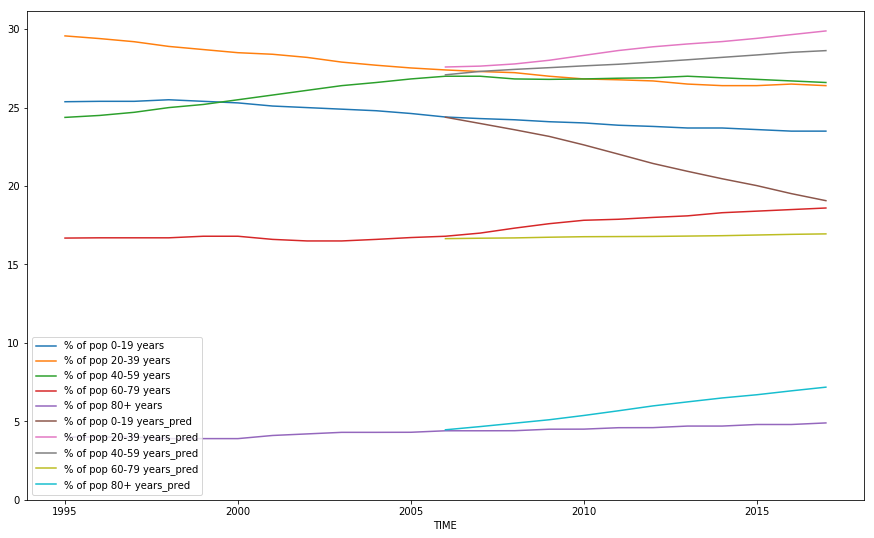

In [18]:
#Make predictions, inverse transform, plot against test data
y_pred = model3.predict(X_test)
resultPlot(y_pred, 1995)

It seems that a windowed approach has just introduced over fitting. Feeding the model sequences has not helped.

#### So was this better than just forecasting each series individually?

In [19]:
#We'll continue to use 4 year sequences as inputs
#Each feature column will be fitted and predicted separately
model_indv = makeModel(4,1,1)

preds = np.zeros((12,5))

for i in range(5):
    X_train_indv = X_train[:,:,None,i].copy()
    X_test_indv = X_test[:,:,None,i].copy()
    y_train_indv = y_train[:,None, i].copy()
    y_test_indv = y_test[:,None, i].copy()
    
    model_indv.fit(X_train_indv, y_train_indv, epochs = 4000, verbose = 0)
    y_pred = model_indv.predict(X_test_indv)
    preds[:,i] = y_pred.reshape(12)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 4, 16)             1152      
_________________________________________________________________
lstm_10 (LSTM)               (None, 4, 32)             6272      
_________________________________________________________________
lstm_11 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 10,577
Trainable params: 10,577
Non-trainable params: 0
_________________________________________________________________


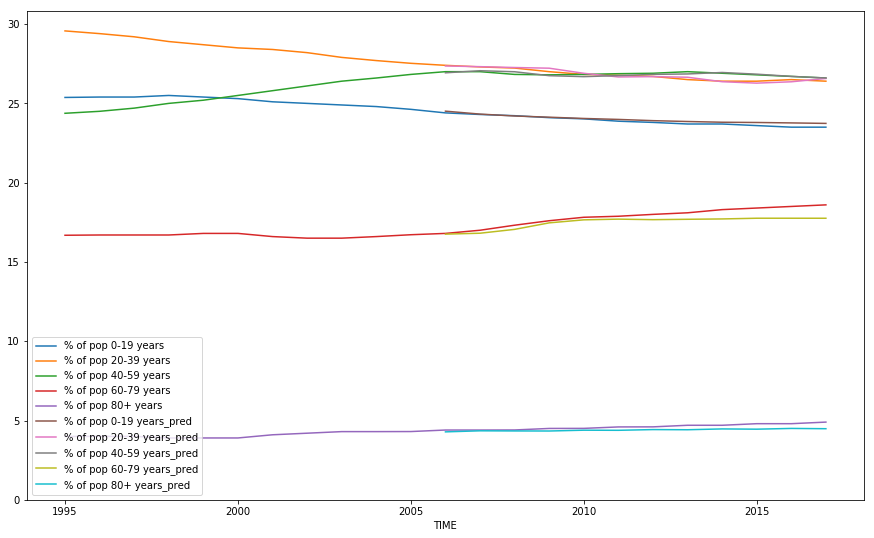

In [20]:
resultPlot(preds, 1995)

This output is far better than the prior models. Each feature can be accurately predicted independent of the other features. Making models that considered all age brackets at once did not make for accurate forecasts. Over fitting is the most likely reason for this. The additional variables just introduced more noise.

This investigation is far from extensive. Perhaps with the right tweaks a multi output model could be superior. The structure of the network could be changed, different activation functions could be used and alternative cells might also improve the output (e.g. GRU cells).

However the dataset is rather simple. We see here that 5 simple models can still get the job done. Only with a complex feature set might it be worth experimenting further.